In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from mpl_toolkits import basemap

import scipy.stats

# Display up to n columns of a dataframe, alternate: "pd.set_option('display.max_columns', 150)"
pd.options.display.max_columns = 300

In [2]:
df = pd.read_csv('dfclean.csv', index_col='date', parse_dates=True)

df.head()

C:\Users\Emtma_000\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (5,32,34,62,63,64,77,80,91,93,95,97,115,116,122) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Unnamed: 0       eventid  iyear  imonth  iday approxdate  \
date                                                                   
1970-07-02           0  197000000001   1970       7     2        NaN   
1970-12-21           1  197000000002   1970      12     0        NaN   
1970-01-28           2  197001000001   1970       1     0        NaN   
1970-01-30           3  197001000002   1970       1     0        NaN   
1970-01-10           4  197001000003   1970       1     0        NaN   

            extended resolution  country         country_txt  region  \
date                                                                   
1970-07-02         0        NaN       58  Dominican Republic       2   
1970-12-21         0        NaN      130              Mexico       1   
1970-01-28         0        NaN      160         Philippines       5   
1970-01-30         0        NaN       78              Greece       8   
1970-01-10         0        NaN      101               Japan       4   

                             region_txt provstate           city   latitude  \
date                                                                          
1970-07-02  Central America & Caribbean  National  Santo Domingo  18.456792   
1970-12-21                North America   Federal    Mexico city  19.371887   
1970-01-28               Southeast Asia    Tarlac        Unknown  15.478598   
1970-01-30               Western Europe    Attica         Athens  37.997490   
1970-01-10                    East Asia   Fukouka        Fukouka  33.580412   

             longitude  specificity  vicinity location summary  crit1  crit2  \
date                                                                           
1970-07-02  -69.951164          1.0         0      NaN     NaN      1      1   
1970-12-21  -99.086624          1.0         0      NaN     NaN      1      1   
1970-01-28  120.599741          4.0         0      NaN     NaN      1      1   
1970-01-30   23.762728          1.0         0      NaN     NaN      1      1   
1970-01-10  130.396361          1.0         0      NaN     NaN      1      1   

            crit3  doubtterr  alternative alternative_txt  connctd_attk  \
date                                                                      
1970-07-02      1          0          NaN             NaN             0   
1970-12-21      1          0          NaN             NaN             0   
1970-01-28      1          0          NaN             NaN             0   
1970-01-30      1          0          NaN             NaN             0   
1970-01-10      1         -9          NaN             NaN             0   

            success  suicide  attacktype1                 attacktype1_txt  \
date                                                                        
1970-07-02        1        0            1                   Assassination   
1970-12-21        1        0            6     Hostage Taking (Kidnapping)   
1970-01-28        1        0            1                   Assassination   
1970-01-30        1        0            3               Bombing/Explosion   
1970-01-10        1        0            7  Facility/Infrastructure Attack   

            attacktype2 attacktype2_txt  attacktype3 attacktype3_txt  \
date                                                                   
1970-07-02          NaN             NaN          NaN             NaN   
1970-12-21          NaN             NaN          NaN             NaN   
1970-01-28          NaN             NaN          NaN             NaN   
1970-01-30          NaN             NaN          NaN             NaN   
1970-01-10          NaN             NaN          NaN             NaN   

            targtype1                targtype1_txt  targsubtype1  \
date                                                               
1970-07-02         14  Private Citizens & Property          68.0   
1970-12-21          7      Government (Diplomatic)          45.0   
1970-01-28         10          Journalists &

In [3]:
df.drop(columns=['Unnamed: 0', 'eventid','imonth','iday','approxdate','dbsource', 'related', 'resolution'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 191464 entries, 1970-07-02 to 2018-12-31
Columns: 126 entries, iyear to scitations
dtypes: float64(53), int64(21), object(52)
memory usage: 185.5+ MB


In [4]:
orig_df = df.reset_index()

**Define Target type of problem and predictor variables**
- Target: "success"

The Success variable represents whether the terrorist attack was, you guessed it, successful or not. The GTD handbook gives full description of how they determined whether attack was deemed successful:

>"Success of a terrorist strike is defined according to the tangible effects of the attack. Success is not judged in terms of the larger goals of the perpetrators. For example, a bomb that exploded in a building would be counted as a success even if it did not succeed in bringing the building down or inducing government repression. The definition of a successful attack depends on the type of attack. Essentially, the key question is whether or not the attack type took place. If a case has multiple attack types, it is successful if any of the attack types are successful, with the exception of assassinations, which are only successful if the intended target is killed." [GTD Codebook(pg26)](https://www.start.umd.edu/gtd/downloads/Codebook.pdf)

- Problem Type: Binary Classification Problem

Since "success" is a categorical feature, this presents a classification problem and project. I will begin the EDA process performing univariate analysis on the target. Because "success" is a discrete-categorical column by nature, we will look within its classes/categories and visualize count totals count percentages and frequency distributions.


- predictor/input variables: At this early stage, we will consider all remaining variables other than "success"


**Determine Data-types**

In [5]:
cat_cols = df.select_dtypes('object') 
print('Categoric subset: shape {}'.format(cat_cols.shape))

print('---------------------') 

int_cols = df.select_dtypes('int64')
print('Numeric integer-type: shape {}'.format(int_cols.shape))

float_cols = df.select_dtypes('float')
print('Numeric float-type: shape {}'.format(float_cols.shape))

num_cols = pd.concat([float_cols, int_cols], axis=1)
print('Numeric subset: shape {}'.format(num_cols.shape))

Categoric subset: shape (191464, 52)
---------------------
Numeric integer-type: shape (191464, 21)
Numeric float-type: shape (191464, 53)
Numeric subset: shape (191464, 74)


_**Numeric columns**_

In [6]:
num_summary = round(num_cols.describe(), 2)
num_summary

latitude  longitude  specificity  alternative  attacktype2  \
count  186884.00  186883.00    191463.00     31070.00      7023.00   
mean       23.46      28.90         1.46         1.30         3.81   
std        18.41      57.23         0.99         0.72         2.31   
min       -53.15    -176.18         1.00         1.00         1.00   
25%        11.27       7.05         1.00         1.00         2.00   
50%        31.45      43.47         1.00         1.00         2.00   
75%        34.62      68.78         1.00         1.00         7.00   
max        74.63     179.37         5.00         5.00         9.00   

       attacktype3  targsubtype1  targ_natlty1  targtype2  targsubtype2  \
count       485.00     180465.00     189742.00   12196.00      11732.00   
mean          5.33         46.98        127.29      10.17         55.01   
std           2.23         30.83         89.80       5.71         25.61   
min           1.00          1.00          4.00       1.00          1.00   
25%           2.00         22.00         83.00       4.00         29.00   
50%           7.00         35.00        100.00      14.00         67.00   
75%           7.00         74.00        168.00      14.00         68.00   
max           8.00        113.00       1004.00      22.00        113.00   

        natlty2  targtype3  targsubtype3  natlty3  guncertain1  guncertain2  \
count  11879.00    1313.00       1234.00  1284.00    191084.00      2158.00   
mean     128.98      10.11         55.77   141.05         0.08         0.27   
std      124.53       5.69         26.11   162.39         0.27         0.44   
min        4.00       1.00          1.00     4.00         0.00         0.00   
25%       74.00       4.00         34.00    69.00         0.00         0.00   
50%       97.00      14.00         67.00   104.00         0.00         0.00   
75%      182.00      14.00         73.00   182.00         0.00         1.00   
max     1004.00      22.00        113.00  1004.00         1.00         1.00   

       guncertain3  nattackers  nattackers_captured  responsibility_claimed  \
count        352.0    120355.0            121981.00               125349.00   
mean           0.2       -66.5                -1.44                    0.07   
std            0.4       208.1                12.50                    1.06   
min            0.0       -99.0               -99.00                   -9.00   
25%            0.0       -99.0                 0.00                    0.00   
50%            0.0       -99.0                 0.00                    0.00   
75%            0.0       -99.0                 0.00                    0.00   
max            1.0     25000.0               406.00                    1.00   

       claim_type   claim2  claimmode2  claim3  claimmode3  \
count    21550.00  2093.00      664.00  350.00      134.00   
mean         7.06     0.25        7.22    0.38        6.70   
std          2.40     0.93        2.72    0.49        2.88   
min          1.00    -9.00        1.00    0.00        1.00   
25%          6.00     0.00        6.00    0.00        4.00   
50%          8.00     0.00        7.00    0.00        7.00   
75%          8.00     1.00       10.00    1.00        9.00   
max         10.00     1.00       10.00    1.00       10.00   

       responsibility_claim_multiple  weapsubtype1  weaptype2  weapsubtype2  \
count                        4890.00     169178.00   14192.00      12492.00   
mean                           -6.23         11.10       6.85         10.92   
std                             4.27          6.49       2.29          7.64   
min                            -9.00          1.00       1.00          1.00   
25%                            -9.00          5.00       5.00          5.00   
50%                            -9.00         12.00       6.00          7.00   
75%                             0.00         16.00       8.00         18.00   
max                             1.00         31.00      13.00         31.00   

      

Text(0.5,1,'Count of Unique Values in numeric Columns')

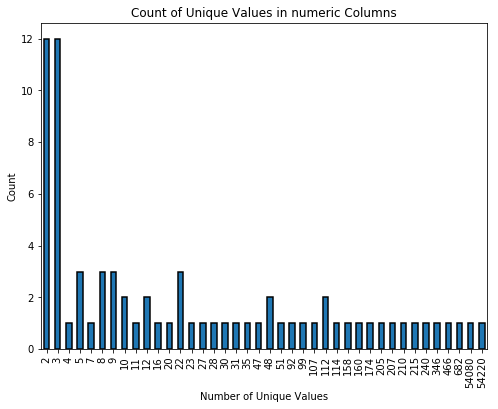

In [7]:
num_cols.nunique().value_counts().sort_index().plot.bar(figsize = (8, 6), edgecolor = 'k', linewidth = 1.5);
plt.xlabel('Number of Unique Values')
plt.ylabel('Count')
plt.title('Count of Unique Values in numeric Columns')

**Float Columns**

In [8]:
float_summary = round(float_cols.describe(), 4)
float_summary

latitude    longitude  specificity  alternative  attacktype2  \
count  186884.0000  186883.0000  191463.0000   31070.0000    7023.0000   
mean       23.4621      28.9021       1.4582       1.2970       3.8091   
std        18.4053      57.2310       0.9915       0.7231       2.3078   
min       -53.1546    -176.1764       1.0000       1.0000       1.0000   
25%        11.2748       7.0527       1.0000       1.0000       2.0000   
50%        31.4458      43.4714       1.0000       1.0000       2.0000   
75%        34.6215      68.7831       1.0000       1.0000       7.0000   
max        74.6336     179.3667       5.0000       5.0000       9.0000   

       attacktype3  targsubtype1  targ_natlty1   targtype2  targsubtype2  \
count     485.0000   180465.0000   189742.0000  12196.0000    11732.0000   
mean        5.3278       46.9764      127.2855     10.1678       55.0051   
std         2.2346       30.8334       89.7952      5.7099       25.6129   
min         1.0000        1.0000        4.0000      1.0000        1.0000   
25%         2.0000       22.0000       83.0000      4.0000       29.0000   
50%         7.0000       35.0000      100.0000     14.0000       67.0000   
75%         7.0000       74.0000      168.0000     14.0000       68.0000   
max         8.0000      113.0000     1004.0000     22.0000      113.0000   

          natlty2  targtype3  targsubtype3    natlty3  guncertain1  \
count  11879.0000  1313.0000     1234.0000  1284.0000  191084.0000   
mean     128.9848    10.1135       55.7715   141.0475       0.0793   
std      124.5322     5.6899       26.1141   162.3855       0.2702   
min        4.0000     1.0000        1.0000     4.0000       0.0000   
25%       74.0000     4.0000       34.0000    69.0000       0.0000   
50%       97.0000    14.0000       67.0000   104.0000       0.0000   
75%      182.0000    14.0000       73.0000   182.0000       0.0000   
max     1004.0000    22.0000      113.0000  1004.0000       1.0000   

       guncertain2  guncertain3   nattackers  nattackers_captured  \
count    2158.0000     352.0000  120355.0000          121981.0000   
mean        0.2697       0.2017     -66.5021              -1.4361   
std         0.4439       0.4018     208.1044              12.5043   
min         0.0000       0.0000     -99.0000             -99.0000   
25%         0.0000       0.0000     -99.0000               0.0000   
50%         0.0000       0.0000     -99.0000               0.0000   
75%         1.0000       0.0000     -99.0000               0.0000   
max         1.0000       1.0000   25000.0000             406.0000   

       responsibility_claimed  claim_type     claim2  claimmode2    claim3  \
count             125349.0000  21550.0000  2093.0000    664.0000  350.0000   
mean                   0.0655      7.0555     0.2465      7.2229    0.3771   
std                    1.0581      2.4034     0.9350      2.7183    0.4854   
min                   -9.0000      1.0000    -9.0000      1.0000    0.0000   
25%                    0.0000      6.0000     0.0000      6.0000    0.0000   
50%                    0.0000      8.0000     0.0000      7.0000    0.0000   
75%                    0.0000      8.0000     1.0000     10.0000    1.0000   
max                    1.0000     10.0000     1.0000     10.0000    1.0000   

       claimmode3  responsibility_claim_multiple  weapsubtype1   weaptype2  \
count    134.0000                      4890.0000   169178.0000  14192.0000   
mean       6.7015                        -6.2301       11.1017      6.8531   
std        2.8838                         4.2682        6.4941      2.2927   
min        1.0000                        -9.0000        1.0000      1.0000   
25%        4.0000                        -9.0000        5.0000      5.0000   
50%        7.0000                        -9.0000       12.0000      6.0000   
75%        9.0000                         0.0000       16.0000      8.0000   
max       10.0000                         1.0000       31.0000     13.0000   


Text(0.5,1,'Count of Unique Values for Floats')

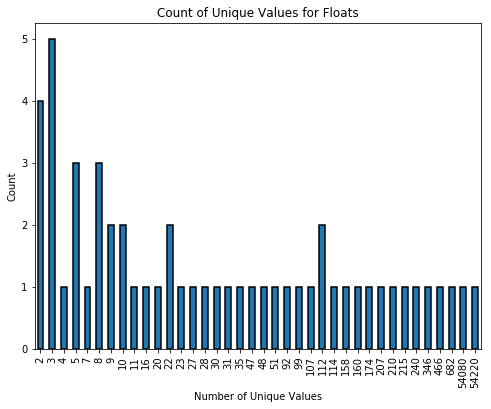

In [9]:
float_cols.nunique().value_counts().sort_index().plot.bar(figsize = (8, 6), edgecolor = 'k', linewidth = 1.5);
plt.xlabel('Number of Unique Values')
plt.ylabel('Count')
plt.title('Count of Unique Values for Floats')

It appears there may be some float-type columns incorrectly labeled  looking at the value counts for number of unique inputs. 

**Integer-type columns**

In [10]:
int_summary = round(int_cols.describe(), 2)
int_summary

iyear   extended    country     region   vicinity      crit1  \
count  191464.00  191464.00  191464.00  191464.00  191464.00  191464.00   
mean     2003.42       0.05     131.29       7.21       0.07       0.99   
std        13.35       0.21     112.06       2.92       0.28       0.11   
min      1970.00       0.00       4.00       1.00      -9.00       0.00   
25%      1991.00       0.00      78.00       6.00       0.00       1.00   
50%      2010.00       0.00      98.00       7.00       0.00       1.00   
75%      2015.00       0.00     160.00      10.00       0.00       1.00   
max      2018.00       1.00    1004.00      12.00       1.00       1.00   

           crit2      crit3  doubtterr  connctd_attk    success    suicide  \
count  191464.00  191464.00  191464.00     191464.00  191464.00  191464.00   
mean        0.99       0.87      -0.49          0.14       0.89       0.04   
std         0.08       0.33       2.40          0.35       0.32       0.19   
min         0.00       0.00      -9.00          0.00       0.00       0.00   
25%         1.00       1.00       0.00          0.00       1.00       0.00   
50%         1.00       1.00       0.00          0.00       1.00       0.00   
75%         1.00       1.00       0.00          0.00       1.00       0.00   
max         1.00       1.00       1.00          1.00       1.00       1.00   

       attacktype1  targtype1  individual  weaptype1   property    INT_LOG  \
count    191464.00  191464.00   191464.00  191464.00  191464.00  191464.00   
mean          3.28       8.45        0.00       6.47      -0.63      -4.52   
std           1.95       6.64        0.06       2.21       3.21       4.54   
min           1.00       1.00        0.00       1.00      -9.00      -9.00   
25%           2.00       3.00        0.00       5.00       0.00      -9.00   
50%           3.00       4.00        0.00       6.00       1.00      -9.00   
75%           3.00      14.00        0.00       6.00       1.00       0.00   
max           9.00      22.00        1.00      13.00       1.00       1.00   

        INT_IDEO   INT_MISC  International_attk  
count  191464.00  191464.00           191464.00  
mean       -4.44       0.09               -3.93  
std         4.64       0.56                4.69  
min        -9.00      -9.00               -9.00  
25%        -9.00       0.00               -9.00  
50%        -9.00       0.00                0.00  
75%         0.00       0.00                0.00  
max         1.00       1.00                1.00

Text(0.5,1,'Count of Unique Values in Integer Columns')

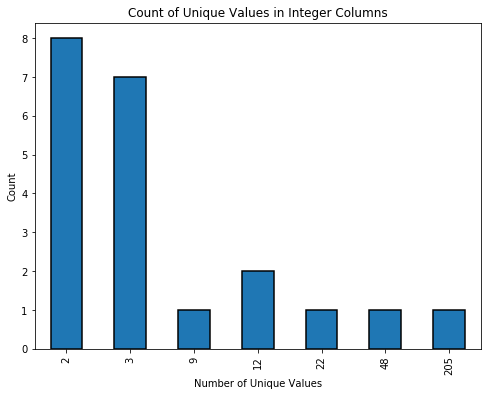

In [11]:
int_cols.nunique().value_counts().sort_index().plot.bar(figsize = (8, 6), edgecolor = 'k', linewidth = 1.5);
plt.xlabel('Number of Unique Values')
plt.ylabel('Count')
plt.title('Count of Unique Values in Integer Columns')

Here we can see that for the most part we have columns of integer type that hold 2-3 values. For the columns with only 2 unique values, these most likely represent our Boolean columns that are made up of 0 or 1, and for columns with 3 unique inputs, these represent columns that are most likely also boolean, but also contain a "-9, -99, -999" value indicating "unknown".

Lets figure out which columns these are, it will be useful to identify them early as our boolean variables.

In [12]:
df.select_dtypes(np.int64).nunique().sort_values()

success                 2
extended                2
crit1                   2
crit2                   2
crit3                   2
individual              2
connctd_attk            2
suicide                 2
INT_IDEO                3
INT_LOG                 3
property                3
International_attk      3
doubtterr               3
vicinity                3
INT_MISC                3
attacktype1             9
weaptype1              12
region                 12
targtype1              22
iyear                  48
country               205
dtype: int64

Below I have created a seperate dataset of only the boolean varaibles after  inspecting the actual values of all columns. This  boolean subset may be usefule later on, if not, it didnt take much effort to come up with.

In [13]:
bool_cols = df[['extended','vicinity','crit1','crit2','crit3',
                    'doubtterr','connctd_attk','success','suicide',
                   'individual','property','INT_LOG','INT_IDEO','INT_MISC',
                'International_attk', 'ransom', 'responsibility_claimed',
               'claim2','responsibility_claim_multiple','ishostkid',
               'claim3','guncertain1','guncertain2','guncertain3']]

bool_w_unknwns = bool_cols[['extended', 'crit3', 'individual', 'property', 
                            'INT_LOG', 'INT_IDEO', 'INT_MISC', 'ransom', 
                            'responsibility_claimed','claim2','responsibility_claim_multiple','ishostkid']]

In [14]:
bool_summary = round(bool_cols.describe(), 2) 
bool_summary

extended   vicinity      crit1      crit2      crit3  doubtterr  \
count  191464.00  191464.00  191464.00  191464.00  191464.00  191464.00   
mean        0.05       0.07       0.99       0.99       0.87      -0.49   
std         0.21       0.28       0.11       0.08       0.33       2.40   
min         0.00      -9.00       0.00       0.00       0.00      -9.00   
25%         0.00       0.00       1.00       1.00       1.00       0.00   
50%         0.00       0.00       1.00       1.00       1.00       0.00   
75%         0.00       0.00       1.00       1.00       1.00       0.00   
max         1.00       1.00       1.00       1.00       1.00       1.00   

       connctd_attk    success    suicide  individual   property    INT_LOG  \
count     191464.00  191464.00  191464.00   191464.00  191464.00  191464.00   
mean           0.14       0.89       0.04        0.00      -0.63      -4.52   
std            0.35       0.32       0.19        0.06       3.21       4.54   
min            0.00       0.00       0.00        0.00      -9.00      -9.00   
25%            0.00       1.00       0.00        0.00       0.00      -9.00   
50%            0.00       1.00       0.00        0.00       1.00      -9.00   
75%            0.00       1.00       0.00        0.00       1.00       0.00   
max            1.00       1.00       1.00        1.00       1.00       1.00   

        INT_IDEO   INT_MISC  International_attk    ransom  \
count  191464.00  191464.00           191464.00  78428.00   
mean       -4.44       0.09               -3.93     -0.15   
std         4.64       0.56                4.69      1.24   
min        -9.00      -9.00               -9.00     -9.00   
25%        -9.00       0.00               -9.00      0.00   
50%        -9.00       0.00                0.00      0.00   
75%         0.00       0.00                0.00      0.00   
max         1.00       1.00                1.00      1.00   

       responsibility_claimed   claim2  responsibility_claim_multiple  \
count               125349.00  2093.00                        4890.00   
mean                     0.07     0.25                          -6.23   
std                      1.06     0.93                           4.27   
min                     -9.00    -9.00                          -9.00   
25%                      0.00     0.00                          -9.00   
50%                      0.00     0.00                          -9.00   
75%                      0.00     1.00                           0.00   
max                      1.00     1.00                           1.00   

       ishostkid  claim3  guncertain1  guncertain2  guncertain3  
count  191286.00  350.00    191084.00      2158.00        352.0  
mean        0.06    0.38         0.08         0.27          0.2  
std         0.50    0.49         0.27         0.44          0.4  
min        -9.00    0.00         0.00         0.00          0.0  
25%         0.00    0.00         0.00         0.00          0.0  
50%         0.00    0.00         0.00         0.00          0.0  
75%         0.00    1.00         0.00         1.00          0.0  
max         1.00    1.00         1.00         1.00          1.0

**Boxplot visualization for boolean variables looking at categoric distributions.** (univariate)

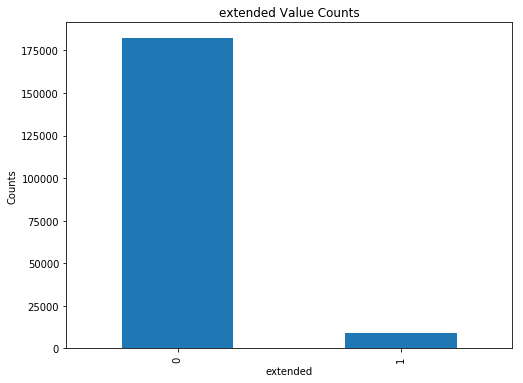

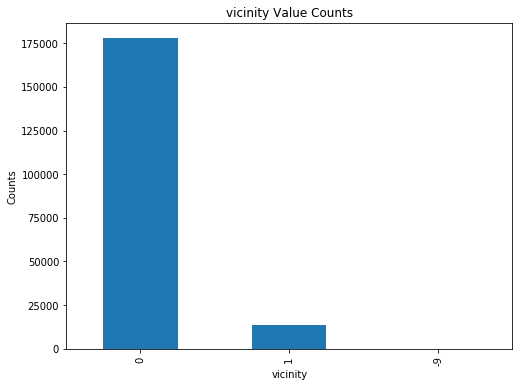

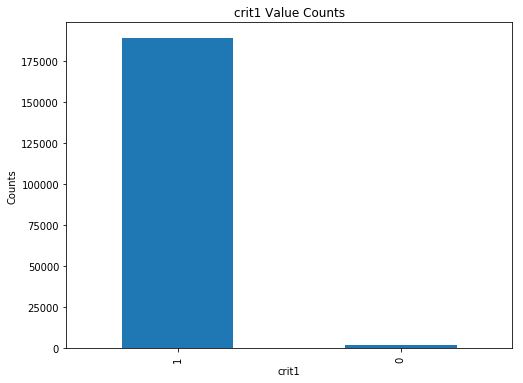

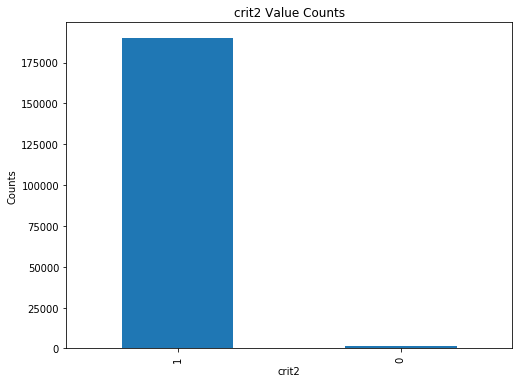

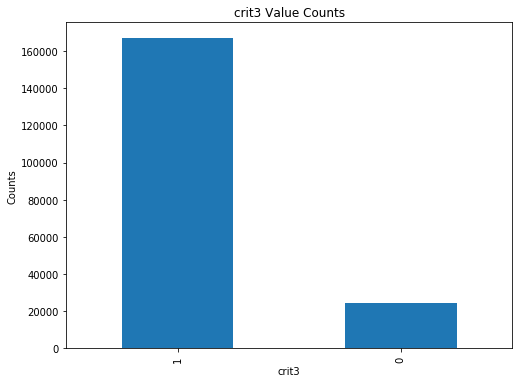

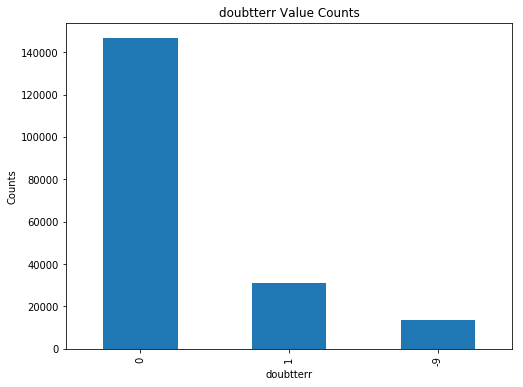

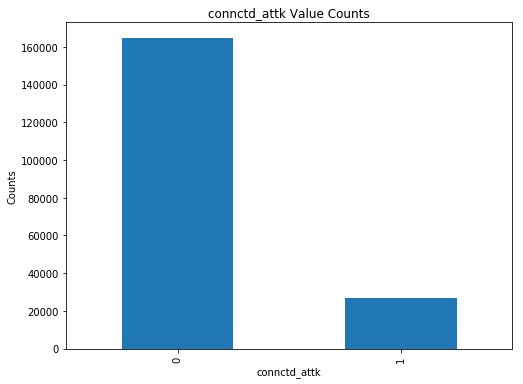

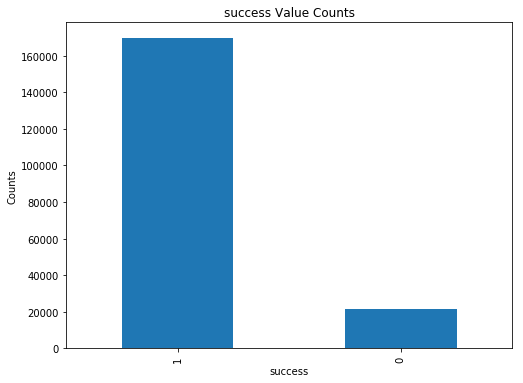

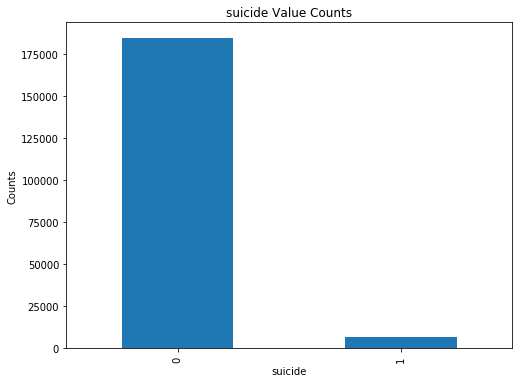

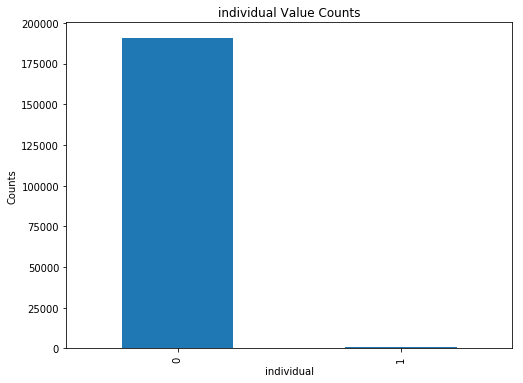

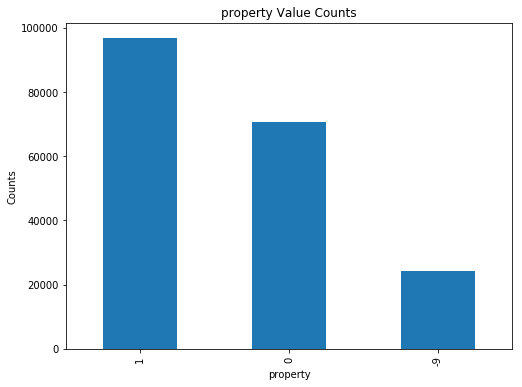

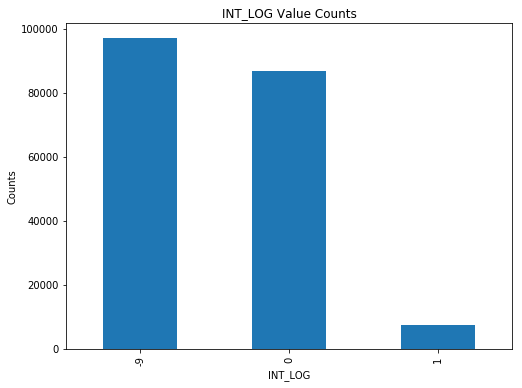

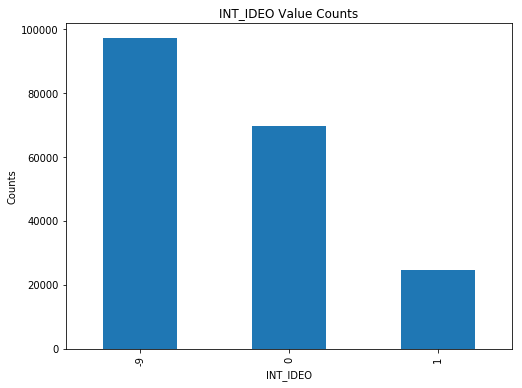

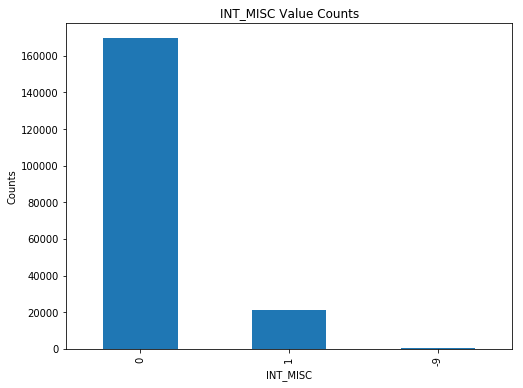

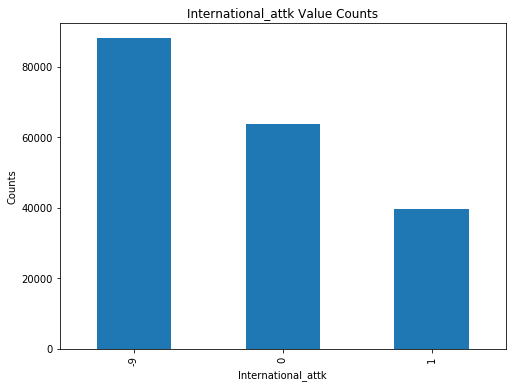

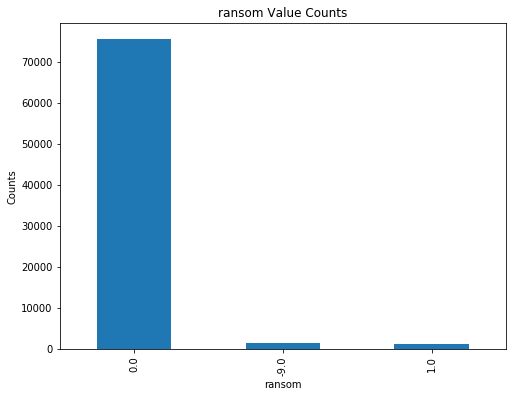

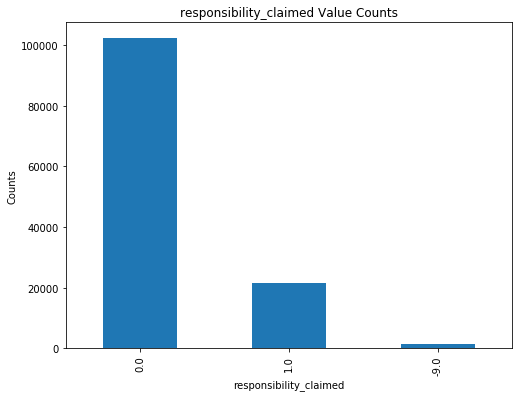

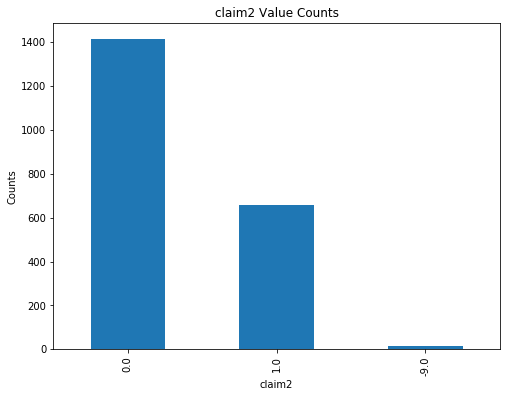

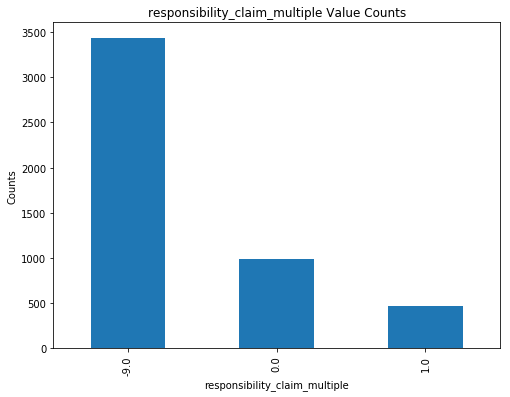

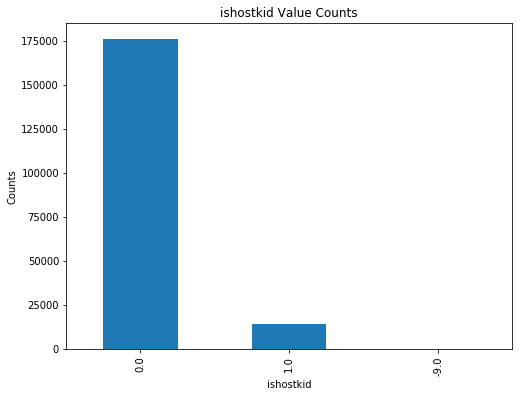

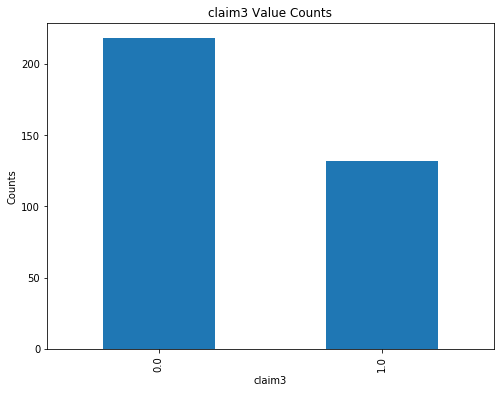

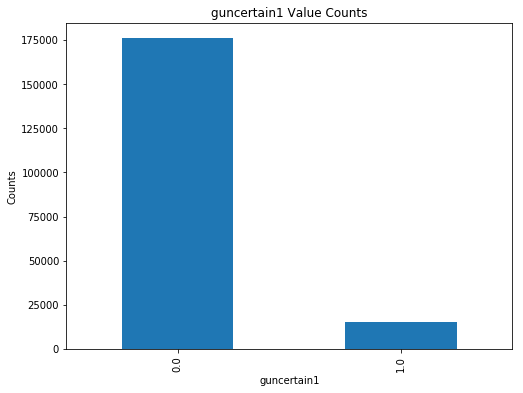

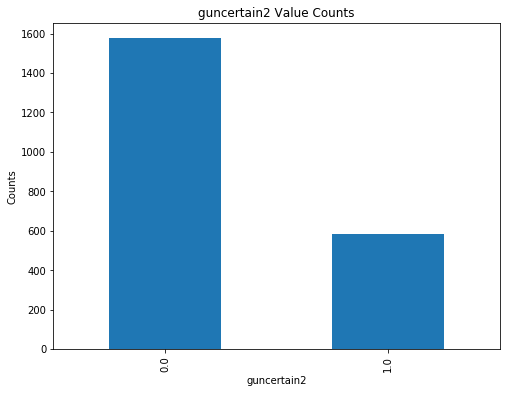

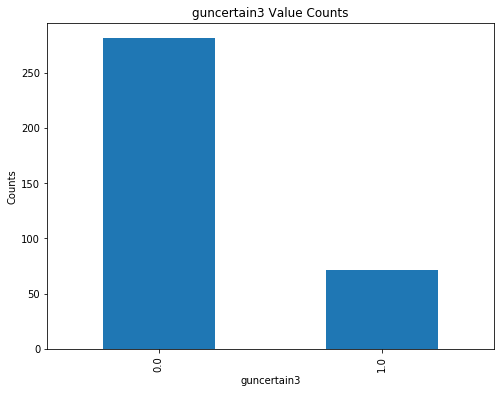

In [15]:
#re-establish our bar plot function from data cleaning notebook
def plot_bar(df, col):
        
    plt.figure(figsize = (8, 6))
    df[col].value_counts().plot.bar()
    plt.xlabel(f'{col}'); plt.title(f'{col} Value Counts'); plt.ylabel('Counts'); plt.show()
    
# plot our numeric boolean variables
for c in bool_cols:
    plot_bar(bool_cols, c)

**Categoric Columns**

Text(0.5,1,'Unique Value counts')

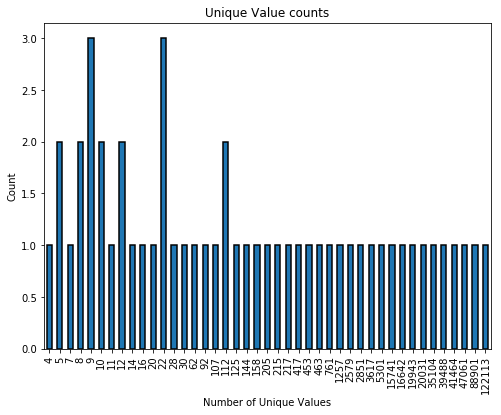

In [16]:
cat_cols.nunique().value_counts().sort_index().plot.bar(figsize = (8, 6), edgecolor = 'k', linewidth = 1.5);
plt.xlabel('Number of Unique Values')
plt.ylabel('Count')
plt.title('Unique Value counts')

In [17]:
categoric_summary = round(cat_cols.describe(), 2)
categoric_summary

country_txt                  region_txt provstate     city  \
count       191464                      191464    191462   191038   
unique         205                          12      2579    39488   
top           Iraq  Middle East & North Africa   Baghdad  Unknown   
freq         26057                       53110      7832    10298   

                                                location  \
count                                              60285   
unique                                             47061   
top     The attack took place in Baghdad, Baghdad, Iraq.   
freq                                                 142   

                                                  summary  \
count                                              125340   
unique                                             122113   
top     09/00/2016: Sometime between September 18, 201...   
freq                                                  100   

                   alternative_txt    attacktype1_txt attacktype2_txt  \
count                        31070             191464            7023   
unique                           5                  9               9   
top     Insurgency/Guerilla Action  Bombing/Explosion   Armed Assault   
freq                         25142              91842            3753   

                       attacktype3_txt                targtype1_txt  \
count                              485                       191464   
unique                               8                           22   
top     Facility/Infrastructure Attack  Private Citizens & Property   
freq                               274                        46283   

                    targsubtype1_txt targ_corpgov1 targ_specfc1  \
count                         180465        148917       190828   
unique                           112         35104        88901   
top     Unnamed Civilian/Unspecified       Unknown    Civilians   
freq                           12233         17851         6983   

       targ_natlty1_txt                targtype2_txt  \
count            189742                        12196   
unique              215                           22   
top                Iraq  Private Citizens & Property   
freq              25522                         6064   

                    targsubtype2_txt   targ_corpgov2 targ_specfc2 natlty2_txt  \
count                          11732           11169        12072       11879   
unique                           107            2851         5301         158   
top     Unnamed Civilian/Unspecified  Not Applicable    Civilians        Iraq   
freq                            3777            3720         2623        1891   

                      targtype3_txt              targsubtype3_txt  \
count                          1313                          1234   
unique                           20                            92   
top     Private Citizens & Property  Unnamed Civilian/Unspecified   
freq                            635                           377   

         targ_corpgov3 targ_specfc3  natlty3_txt terr_grp terr_grp_subname  \
count             1163         1312         1284   191464             6474   
unique             463          761          112     3617             1257   
top     Not Applicable    Civilians  Afghanistan  Unknown        Militants   
freq               379          243          166    86261              480   

                                    terr_grp2 terr_grp_subname2  \
count                                    2216               164   
unique                                    453                62   
top     Khorasan Chapter of the Islamic State        The Family   
freq                                       63                20   

               terr_grp3          terr_grp_subname3   motive  claim_type_txt  \
count                356                         21    52230           21550   
unique               125                         14    15741              10

**Univariate Analysis**

We will look to some of the more interesting variables independantly along with our target variable, all on an individual univariate level of analysis to begin with. **For continious variables** we will look to understand things like the central tendancy (average) and the spread (standard deviations) and visualize these with histograms and boxplots. **For categorical variables**, we will look at class frequencies and distributions using boxplots for total counts per category, as well as barplots. We will use frequency tables to understand count percentages among categories.

**Variables:**

- "success" (target), "attacktype1_txt", "weaptype1_txt", targtype1_txt"

In [74]:
print(df.success.value_counts())
print('----------------------------------------')
print(df.success.describe())

1    169795
0     21669
Name: success, dtype: int64
----------------------------------------
count    191464.000000
mean          0.886825
std           0.316808
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: success, dtype: float64


**Looking at target (success) count percentages**

Total number of successful attacks: 169795
Total number of failed attacks: 21669


Successful attacks as a percentage of all attacks: 0.887
Failed attacks as a percentage of all attacks: 0.113


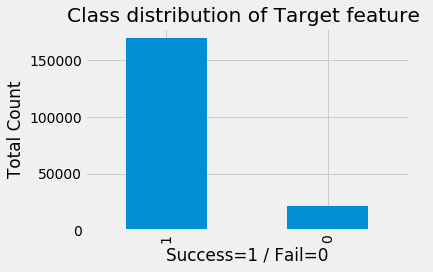

In [75]:
print('Total number of successful attacks: ' + str(df.loc[df.success == 1, 'success'].count()))
print('Total number of failed attacks: ' + str(df.loc[df.success == 0, 'success'].count()))
print('\n')

succ = int(df.loc[df.success == 1, 'success'].count())
fail = int(df.loc[df.success == 0, 'success'].count())

tot = succ + fail
success_percentage = succ / tot
fail_percentage = fail / tot

df.success.value_counts().plot.bar()
plt.title('Class distribution of Target feature '), plt.xlabel('Success=1 / Fail=0'), plt.ylabel('Total Count')
plt.tight_layout()

print('Successful attacks as a percentage of all attacks: ' + str(round(success_percentage, 3)))
print('Failed attacks as a percentage of all attacks: ' + str(round(fail_percentage, 3)))

As shown in the plot, the successful attacks vs attacks deemed unsuccessful is very lop-sided, which means if chosen as target, we then are dealing with not only a binary classification problem, but one that is unbalanced among its classes ("0" and "1"). Unbalanced targets arent uncommon and a widely used method for dealing with unbalanced classes, like we have here, is known as **resampling**. Where you either up-sample the under-represented class ("0") or down-sample on "1" (over-represented). 

Described in other words and displayed below ([image and quote source](https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets)), "It consists of removing samples from the majority class (under-sampling) and / or adding more examples from the minority class (over-sampling).".

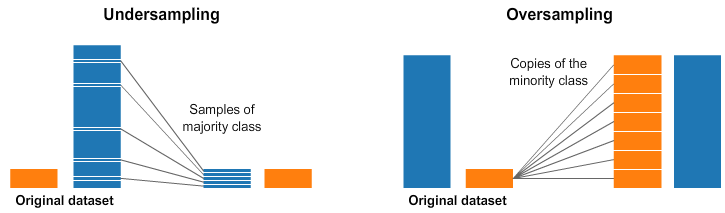

Dealing with this unbalanced set is something that will need to be dealt with but not at this stage. For now lets get back to exploring more of our data.

Bombing/Explosion                      91842
Armed Assault                          45251
Assassination                          20117
Hostage Taking (Kidnapping)            12138
Facility/Infrastructure Attack         11017
Unknown                                 8267
Unarmed Assault                         1096
Hostage Taking (Barricade Incident)     1048
Hijacking                                688
Name: attacktype1_txt, dtype: int64
----------------------------------------
3    91842
2    45251
1    20117
6    12138
7    11017
Name: attacktype1, dtype: int64
-------------------------------------
count                191464
unique                    9
top       Bombing/Explosion
freq                  91842
Name: attacktype1_txt, dtype: object


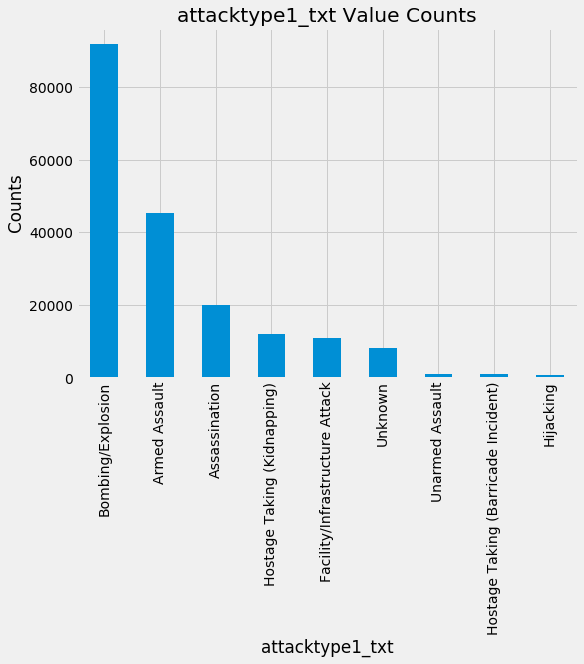

In [64]:
print(df.attacktype1_txt.value_counts())
print('----------------------------------------')
print(df.attacktype1.value_counts(ascending=False).head(5))
print('-------------------------------------')
print(df.attacktype1_txt.describe())
plot_bar(df, 'attacktype1_txt')

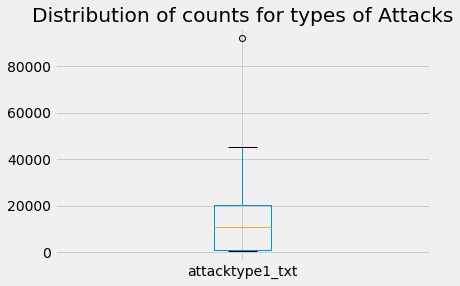

In [65]:
attacktype_txt_counts = df.attacktype1_txt.value_counts(ascending=False)
attacktype_txt_counts.plot.box()
plt.title('Distribution of counts for types of Attacks')
plt.show()

Explosives                                                                     96407
Firearms                                                                       61885
Unknown                                                                        16621
Incendiary                                                                     11791
Melee                                                                           3905
Chemical                                                                         336
Sabotage Equipment                                                               158
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      153
Other                                                                            127
Biological                                                                        35
Fake Weapons                                                                      33
Radiological                                                     

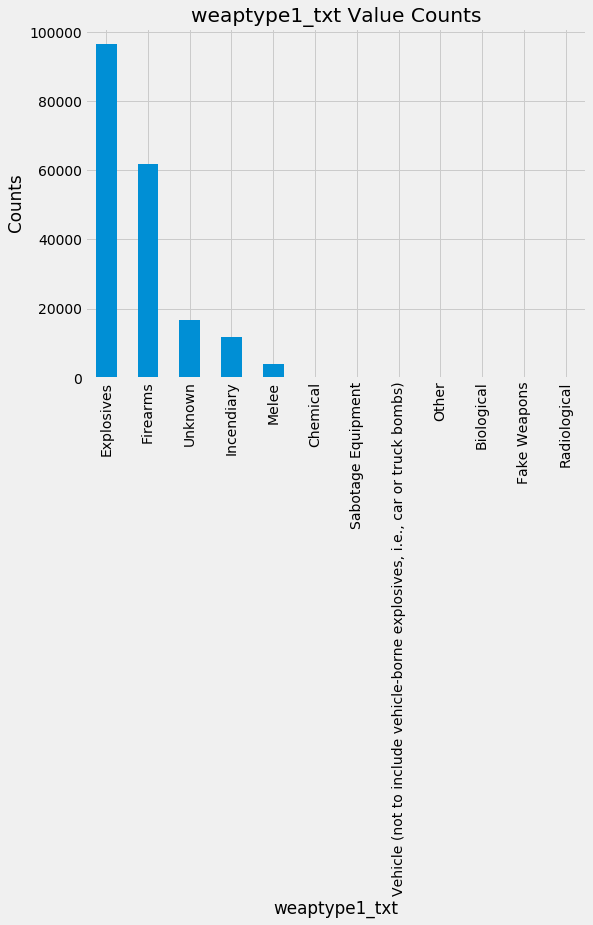

In [57]:
print(df.weaptype1_txt.value_counts())
print('----------------------------------------')
print(df.weaptype1.value_counts(ascending=False).head(5))
print('-------------------------------------')
print(df.weaptype1_txt.describe())
plot_bar(df, 'weaptype1_txt')

Text(0.5,1,'Count distribution for weapon type (all attacks)')

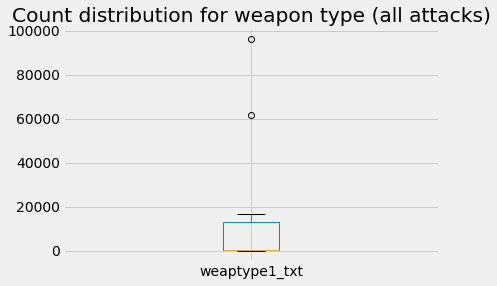

In [59]:
#df['targtype1_success'] = df.loc[df.success == 1, 'targtype1'].value_counts(ascending=False)

weaptype_txt_counts = df.weaptype1_txt.value_counts(ascending=False)
weaptype_txt_counts.plot.box()
plt.title('Count distribution for weapon type (all attacks)')

Private Citizens & Property       46283
Military                          29978
Police                            26023
Government (General)              22274
Business                          21277
Transportation                     6929
Unknown                            6449
Utilities                          6158
Religious Figures/Institutions     4693
Educational Institution            4500
Government (Diplomatic)            3664
Terrorists/Non-State Militia       3207
Journalists & Media                3072
Violent Political Party            1959
Airports & Aircraft                1363
Telecommunication                  1052
NGO                                1020
Tourists                            449
Maritime                            371
Food or Water Supply                330
Abortion Related                    265
Other                               148
Name: targtype1_txt, dtype: int64
----------------------------------------
14    46283
4     29978
3     26023
2     222

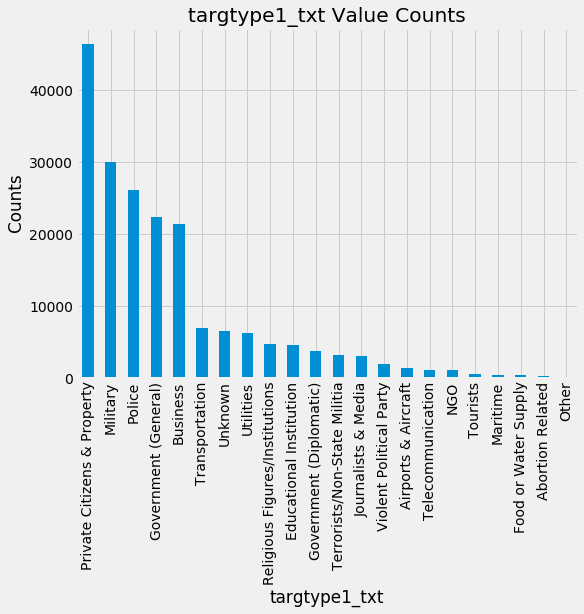

In [52]:
print(df.targtype1_txt.value_counts())
print('----------------------------------------')
print(df.targtype1.value_counts(ascending=False).head(5))
print('-------------------------------------')
print(df.targtype1_txt.describe())
plot_bar(df, 'targtype1_txt')

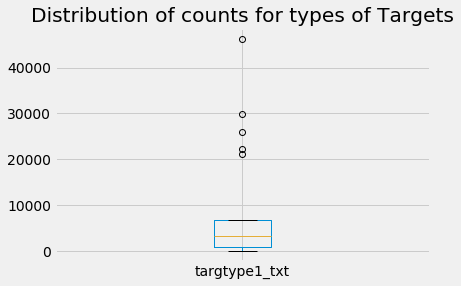

In [56]:
#df['targtype1_success'] = df.loc[df.success == 1, 'targtype1'].value_counts(ascending=False)

targtype_txt_counts = df.targtype1_txt.value_counts(ascending=False)
targtype_txt_counts.plot.box()
plt.title('Distribution of counts for types of Targets')
plt.show()

In [ ]:
#Plot distribution for all columns 
#for c in num_cols:
    #plot_bx(num_cols, c)

In [23]:
num_cols1 = num_cols.iloc[:, 0:18]
num_cols2 = num_cols.iloc[:, 18:36]
num_cols3 = num_cols.iloc[:, 36:55]
num_cols4 = num_cols.iloc[:, 55:]
print(num_cols1.shape, num_cols2.shape, num_cols3.shape, num_cols4.shape)

(191464, 18) (191464, 18) (191464, 19) (191464, 19)


**Visualize distribution of numeric cols with Density plot, colored by success/fails**

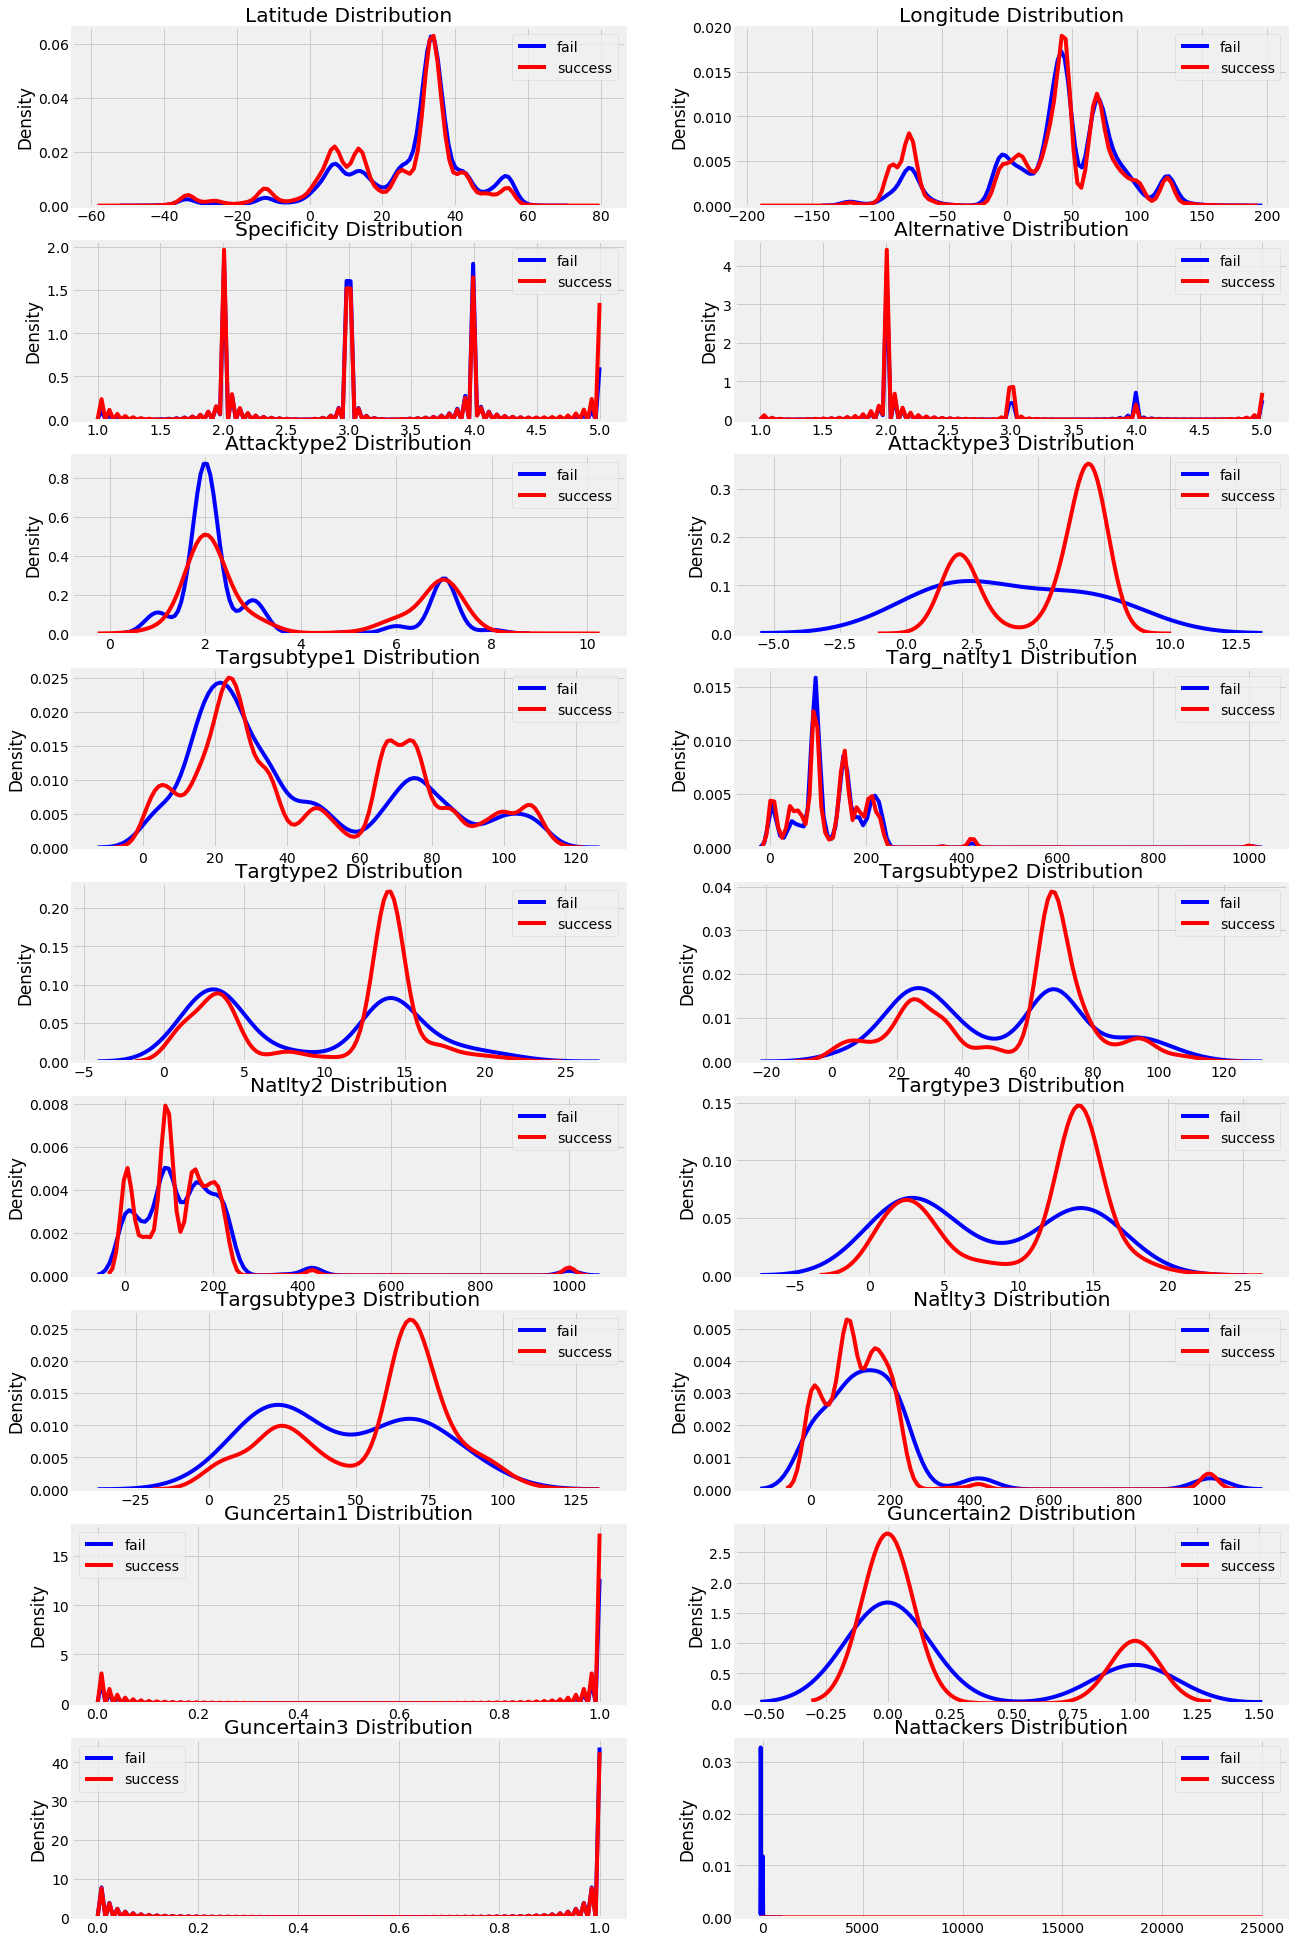

In [24]:
from collections import OrderedDict

plt.figure(figsize = (45, 30))
plt.style.use('fivethirtyeight')

colors = OrderedDict({0: 'blue', 1: 'red' })
outcome = OrderedDict({0: 'fail', 1: 'success'})


for i, col in enumerate(num_cols1): # iterate on cols
    ax = plt.subplot(9, 2, i + 1)
    for success, color in colors.items(): # iterate on outcome
        sns.kdeplot(df.loc[df['success'] == success, col].dropna(),
                    ax= ax, color= color, label= outcome[success])  # Plot each outcome class (success/fail)     
    plt.title(f'{col.capitalize()} Distribution'); plt.xlabel(''); plt.ylabel('Density')

plt.subplots_adjust(right=0.5, top=1)

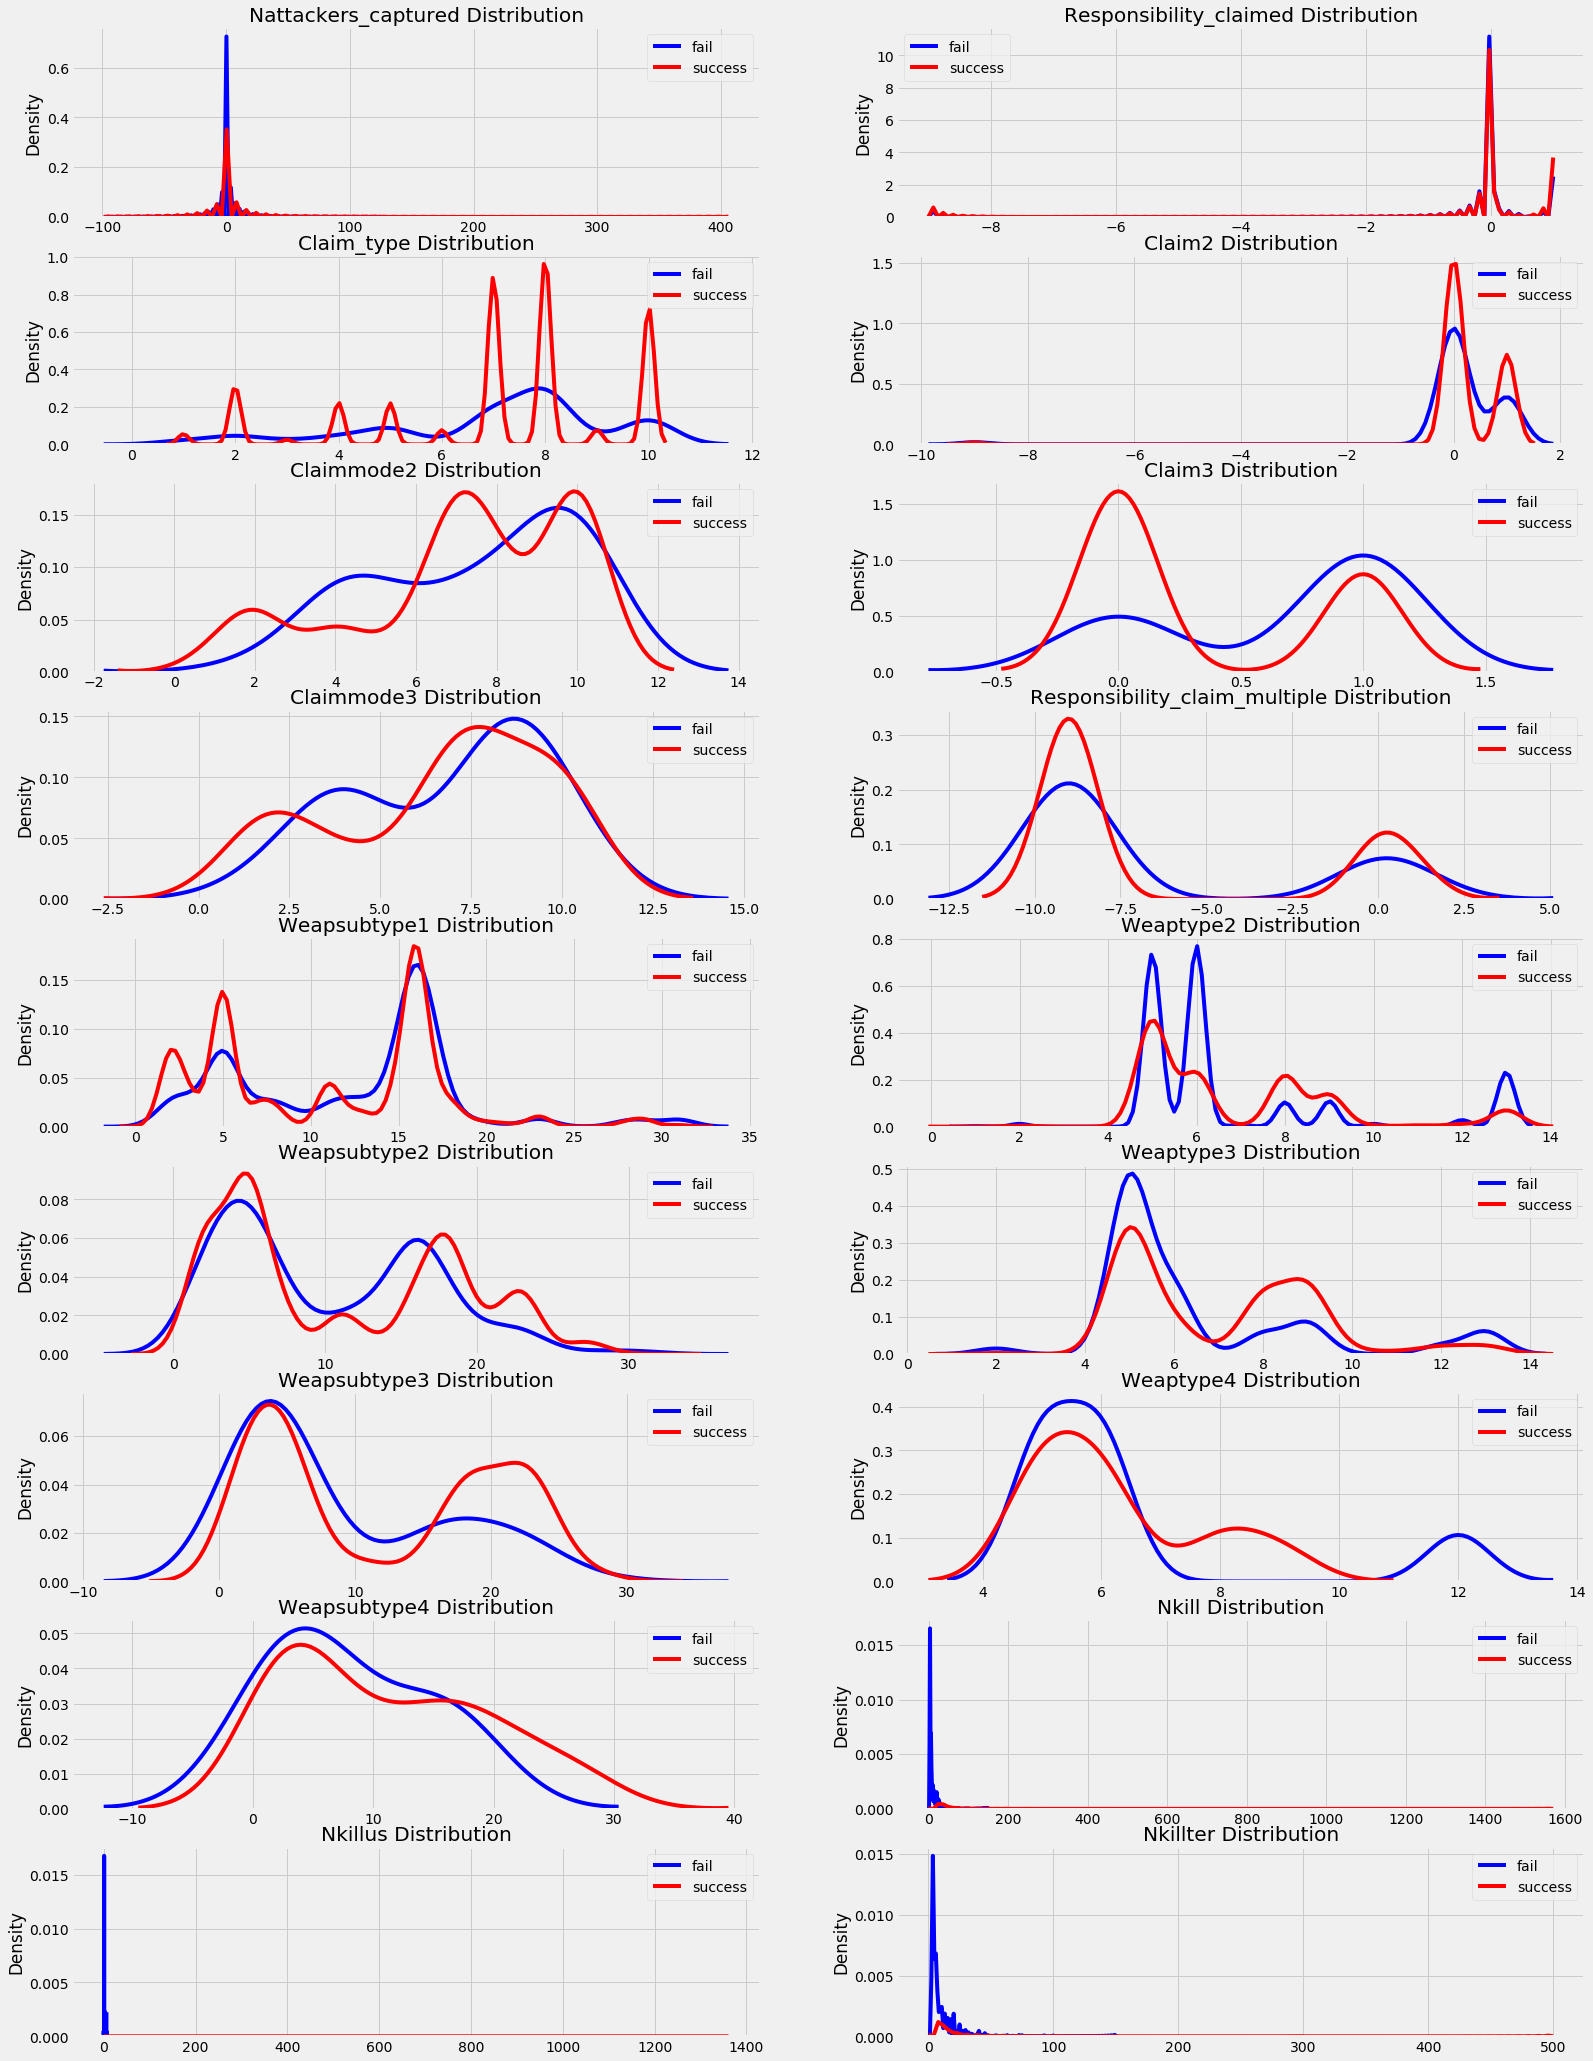

In [25]:
plt.figure(figsize = (50, 30))
plt.style.use('fivethirtyeight')

colors = OrderedDict({0: 'blue', 1: 'red' })
outcome = OrderedDict({0: 'fail', 1: 'success'})


for i, col in enumerate(num_cols2): # iterate on cols
    ax = plt.subplot(9, 2, i + 1)
    for success, color in colors.items(): # iterate on outcome
        sns.kdeplot(df.loc[df['success'] == success, col].dropna(),
                    ax= ax, color= color, label= outcome[success])  # Plot each outcome class (success/fail)     
    plt.title(f'{col.capitalize()} Distribution'); plt.xlabel(''); plt.ylabel('Density')

plt.subplots_adjust(right=0.5, top=1)
#plt.subplots_adjust(top=1.5)#, bottom=1)

C:\Users\Emtma_000\Anaconda3\lib\site-packages\numpy\core\_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Emtma_000\Anaconda3\lib\site-packages\numpy\core\_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Emtma_000\Anaconda3\lib\site-packages\statsmodels\nonparametric\bandwidths.py:20: RuntimeWarning: invalid value encountered in minimum
  return np.minimum(np.std(X, axis=0, ddof=1), IQR)
C:\Users\Emtma_000\Anaconda3\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


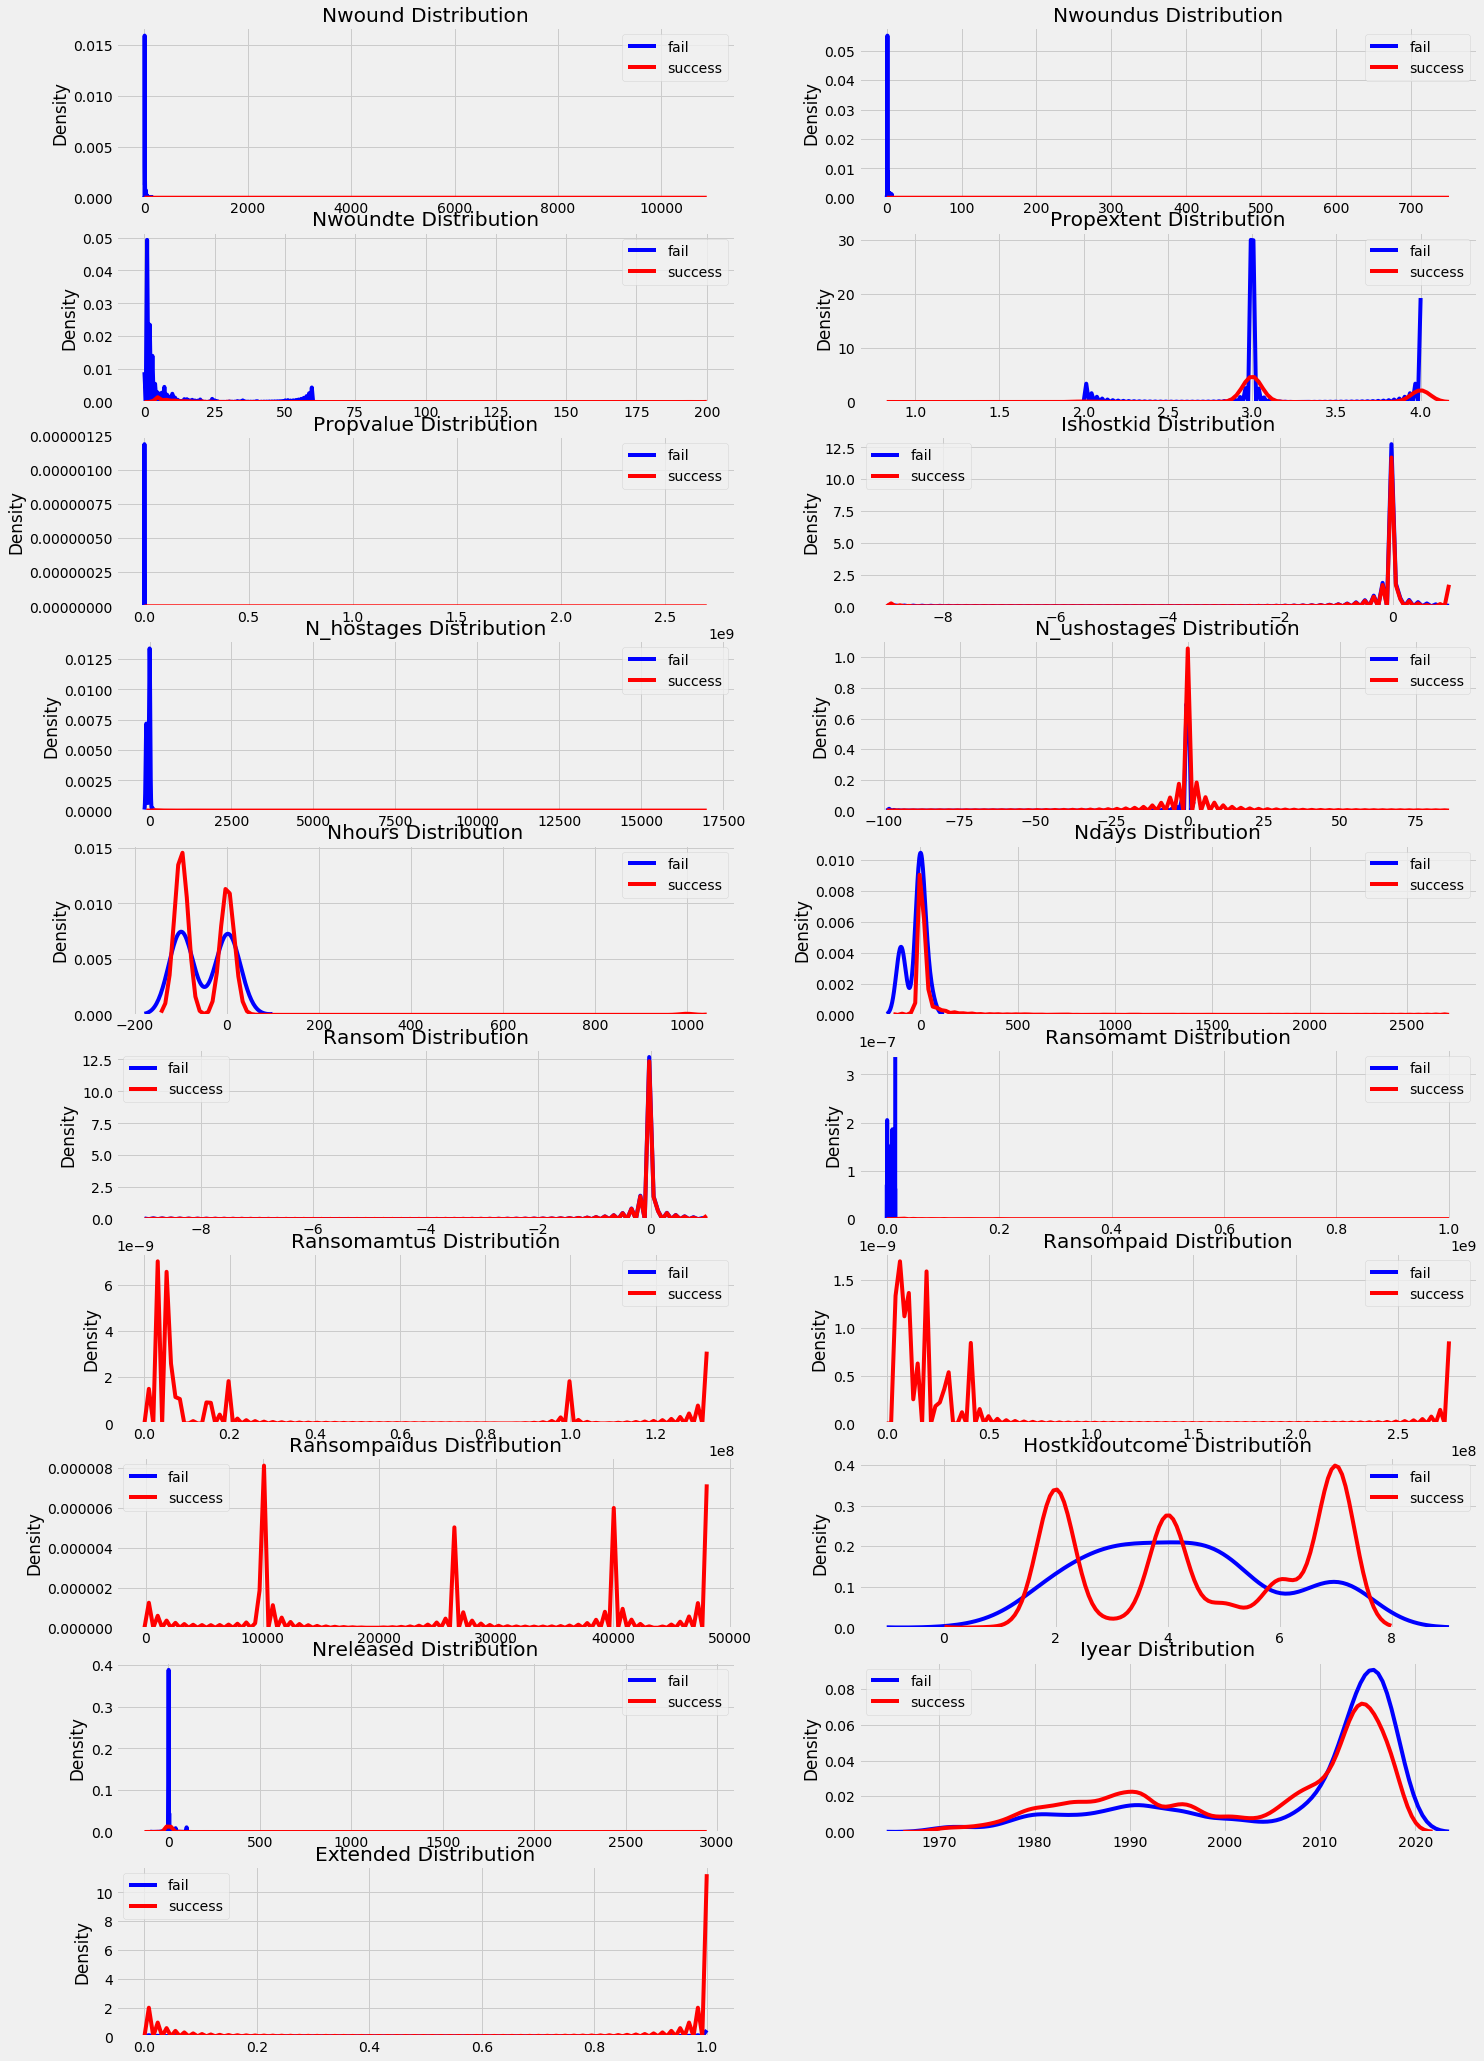

In [26]:
plt.figure(figsize = (45, 30))
plt.style.use('fivethirtyeight')

colors = OrderedDict({0: 'blue', 1: 'red' })
outcome = OrderedDict({0: 'fail', 1: 'success'})


for i, col in enumerate(num_cols3): # iterate on cols
    ax = plt.subplot(10, 2, i + 1)
    for success, color in colors.items(): # iterate on outcome
        sns.kdeplot(df.loc[df['success'] == success, col].dropna(),
                    ax= ax, color= color, label= outcome[success])  # Plot each outcome class (success/fail)     
    plt.title(f'{col.capitalize()} Distribution'); plt.xlabel(''); plt.ylabel('Density')

plt.subplots_adjust(right=0.5, top=1)

C:\Users\Emtma_000\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Emtma_000\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Emtma_000\Anaconda3\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


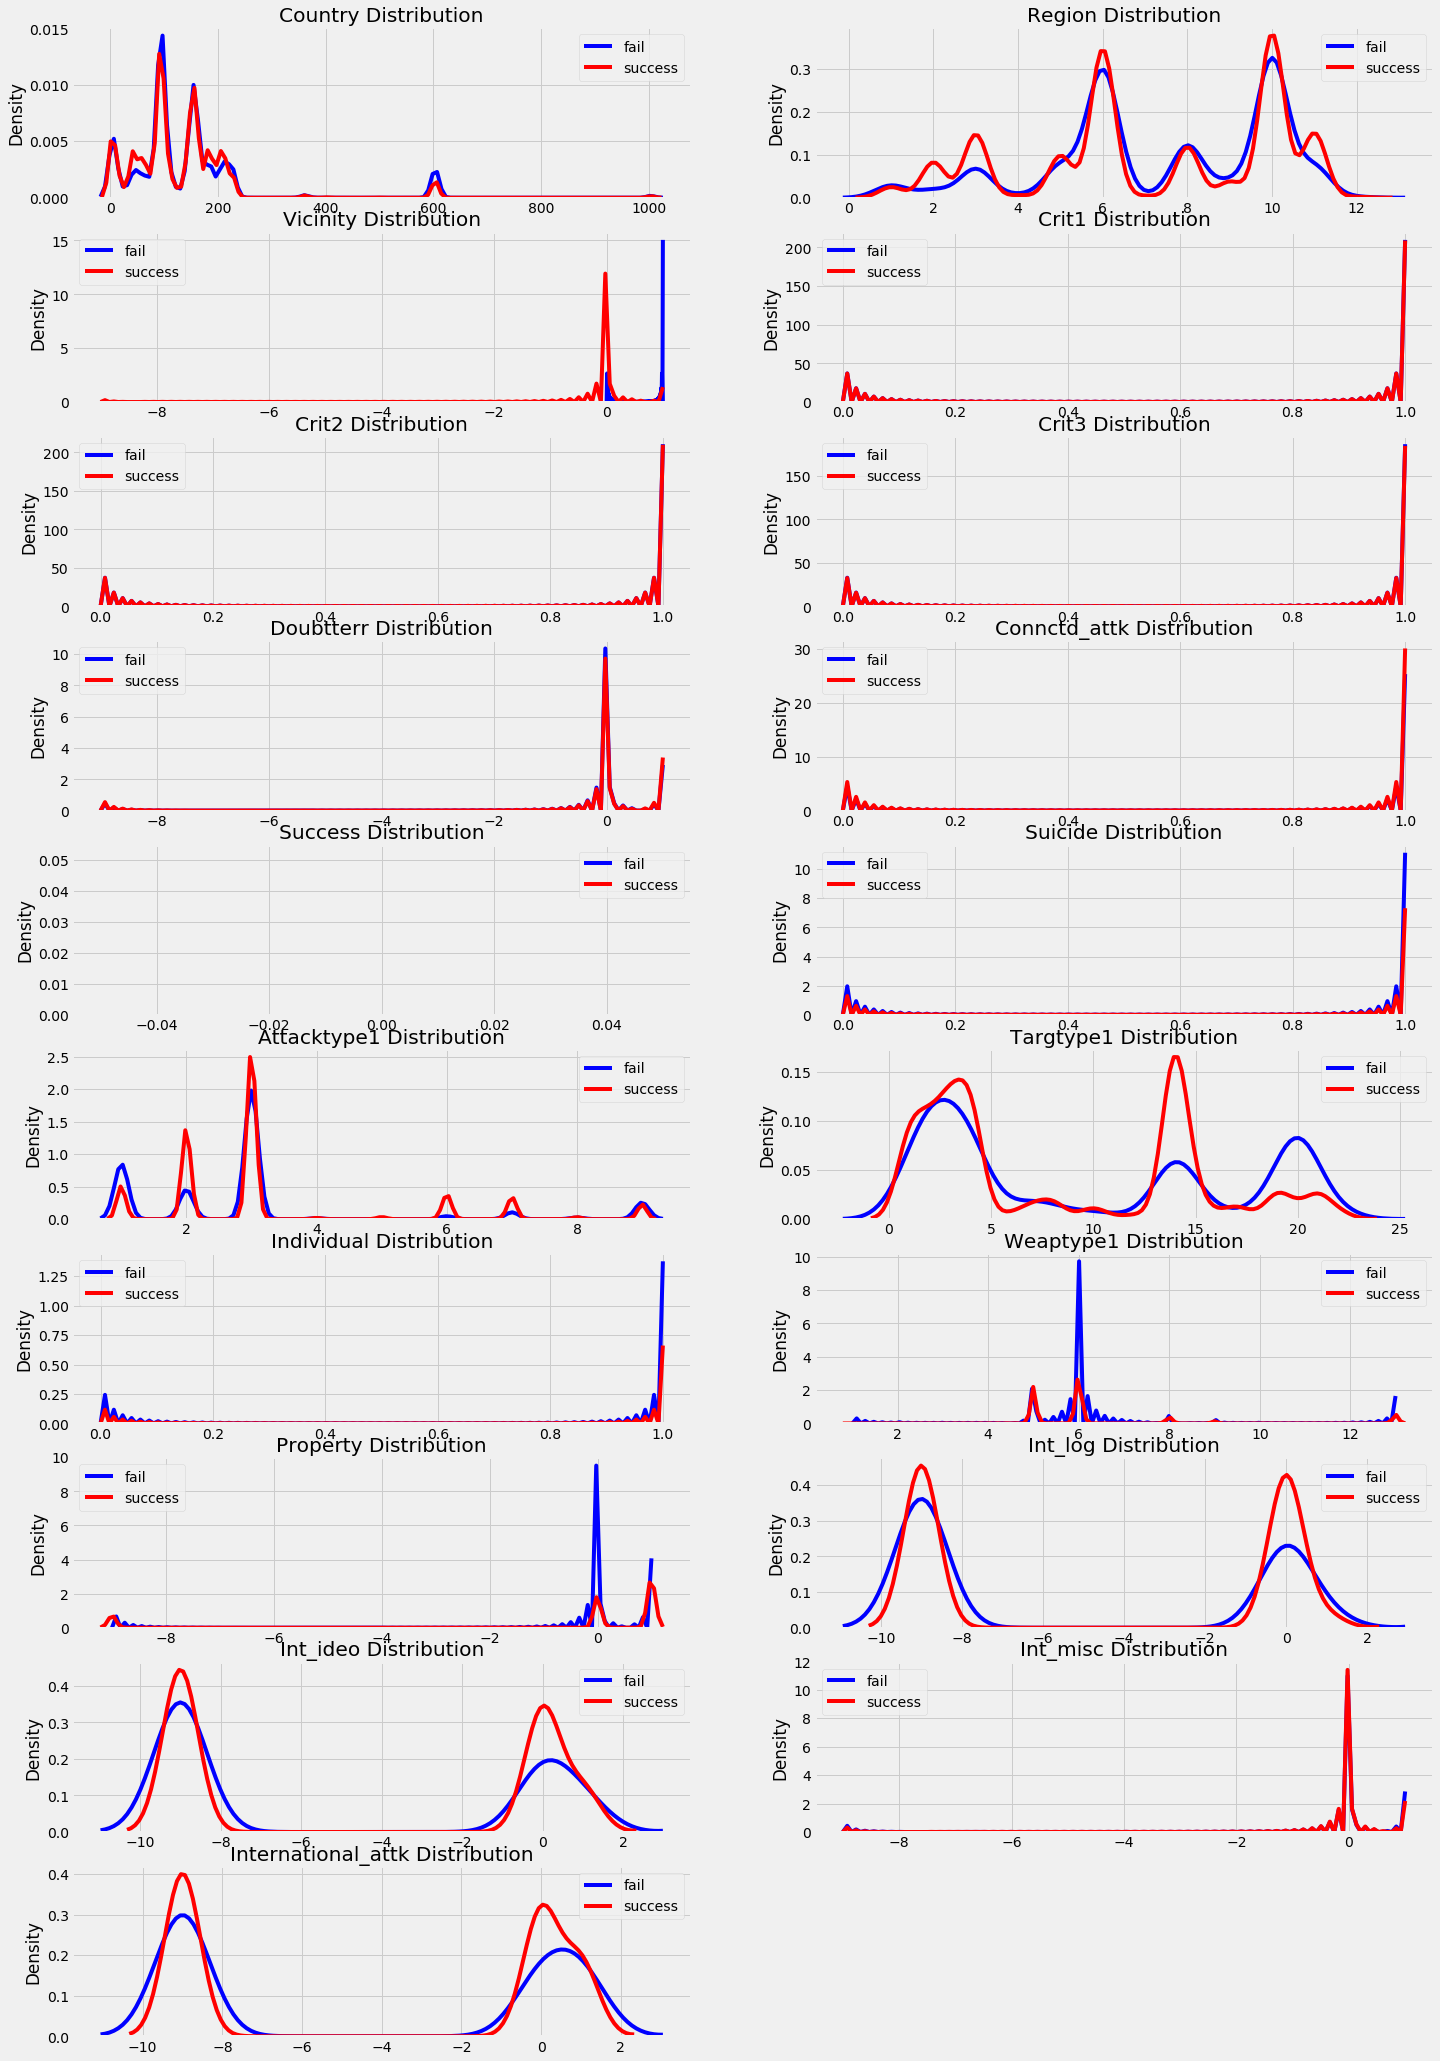

In [263]:
plt.figure(figsize = (45, 30))
plt.style.use('fivethirtyeight')

colors = OrderedDict({0: 'blue', 1: 'red' })
outcome = OrderedDict({0: 'fail', 1: 'success'})


for i, col in enumerate(num_cols4): # iterate on cols
    ax = plt.subplot(10, 2, i + 1)
    for success, color in colors.items(): # iterate on outcome
        sns.kdeplot(df.loc[df['success'] == success, col].dropna(),
                    ax= ax, color= color, label= outcome[success])  # Plot each outcome class (success/fail)     
    plt.title(f'{col.capitalize()} Distribution'); plt.xlabel(''); plt.ylabel('Density')

plt.subplots_adjust(right=0.5, top=1)

Lets now look specifically at types of attacks, weapon types and targets which we will continue to focus on throughout EDA. I will plot each one in their own plot for better views.

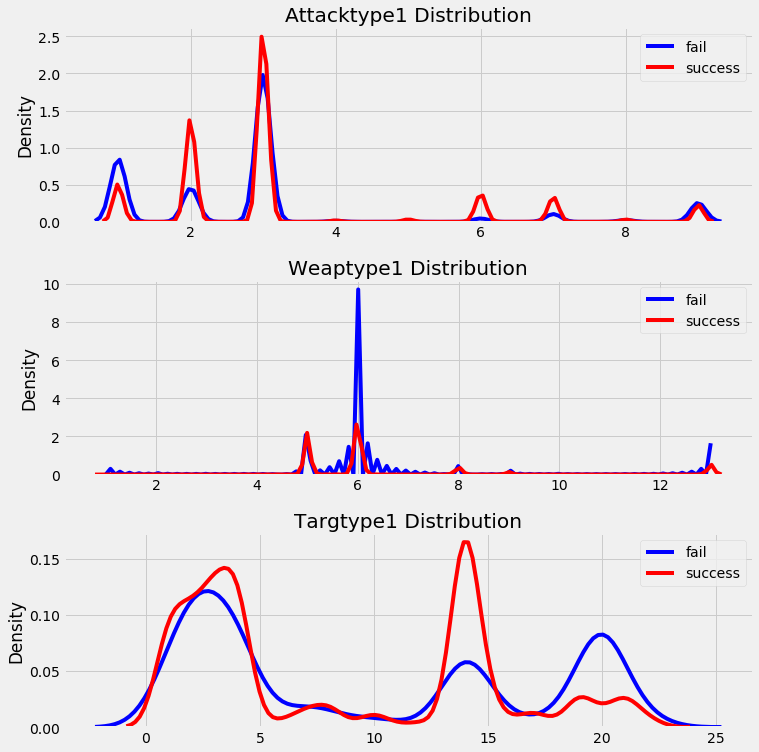

In [267]:
from collections import OrderedDict
pd.options.mode.chained_assignment = None

# plot and visualize distribution of success and fails for different attack, weapons
plt.figure(figsize = (11, 4))
plt.style.use('fivethirtyeight')

# Color mapping
color_map = OrderedDict({0: 'blue', 1: 'red' })
outcome_map = OrderedDict({0: 'fail', 1: 'success'})

for i, col in enumerate(['attacktype1', 'weaptype1', 'targtype1']):
    ax = plt.subplot(3, 1, i + 1)
    # Iterate over success/fail
    for outcome, color in color_map.items():
        # Plot outcome for each categoric-class
        chart = sns.kdeplot(df.loc[df['success'] == outcome, col].dropna(), 
                    ax = ax, color = color, label = outcome_map[outcome])
    
    #chart.set_xticklabels(orig_targ_idx, rotation= 45, horizontalalignment='right')    
    plt.title(f'{col.capitalize()} Distribution'); plt.xlabel(''); plt.ylabel('Density')

plt.subplots_adjust(top=2.5, hspace=0.3)

#Create pair grid

pg = sns.PairGrid(data=num_cols, vars = ['']) #, vars = [''], size = 4

#Map plots to locs

grid = pg.map_upper(plt.scatter) ##grid = pg.map_upper() #can map multiple funcs to grid sections: try corr w/ scatter
grid = pg.map_lower(sns.boxplot) #cmap =
grid = pg.map_diag(plt.hist, bins = 10) # edgecolor=, color= 

#custom function for boxplot
def plot_bx(df, col):
        
    fig, ax = plt.subplots(9, 8,)#plt.figure(figsize = (4, 6))
    df[col].value_counts().plot.box()
    plt.title(f'{col} Quartiles'); plt.ylabel('Distribution'); plt.show()
    
for c in num_cols:
    #fig, ax = plt.subplots(9, 8)
    plot_bx(num_cols, c)

#Scatter plot entire df

sub_1 = df.iloc[:, 0:25]
sub_2 = df.iloc[:, 25:51]
sub_3 = df.iloc[:, 51:76]
sub_4 = df.iloc[:, 76:106]
sub_5 = df.iloc[:, 106:]

sub_1.plot.scatter()
sub_2.plot.scatter()
sub_3.plot.scatter()
sub_4.plot.scatter()
sub_5.plot.scatter()

# Bivariate and Multivariate Analysis

Lets Start by taking a top-down Birds-eye view by looking at trends over the years for number of attacks world-wide then by region. I will look at the success counts visually and calculate some simple summary statistic(s) such as count percentage of all attacks.

**Attack Totals Trend over the years**

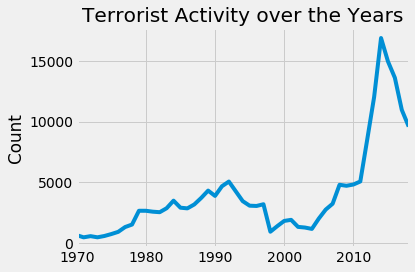

In [70]:
df.iyear.value_counts().sort_index().plot()
plt.title('Terrorist Activity over the Years'), plt.ylabel('Count')
plt.tight_layout()

We can see the trend here over the entire course of time attacks had been being tracked. In the bar-chart above we can clearly see there began a decline from the 80's through the 2000's, then things really got out of hand relative to previous decade totals, in the 2010-current bin. Lets take a closer look at this last decade. Not only the steep incline, but decline also at about the midpoint (of the decade) it looks like.


**Close-Up lool at huge Spike**

In [101]:
x = df.iyear.value_counts().sort_index()
x = pd.DataFrame(x, index=x.index)
x = x.reset_index()
x.rename(columns={'index':'year', 'iyear':'total_attacks'}, inplace=True)
xlabel = x.iloc[39:].year.values
print(x.iloc[39:])

    year  total_attacks
39  2010           4826
40  2011           5076
41  2012           8529
42  2013          12041
43  2014          16908
44  2015          14977
45  2016          13626
46  2017          10980
47  2018           9607


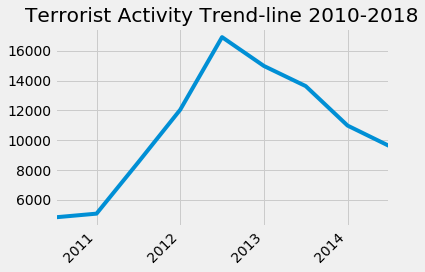

In [99]:
chart = x.iloc[39:].total_attacks.plot()
chart.set_xticklabels(xlabel, rotation=45, horizontalalignment='right')

#x tic labels
_2010_2018_ = x.iloc[39:]
labels = list(_2010_2018_.year.values)
labels
#plot snippet
chart.set_xticklabels(labels=labels)
plt.tight_layout()
plt.title('Terrorist Activity Trend-line 2010-2018')
plt.tight_layout()

**Total Success and Fails by Decade**

success      0      1
decades              
1970s      939   8975
1980s     2326  28832
1990s     2625  26139
2000s     1747  23311
2010s    14032  82538


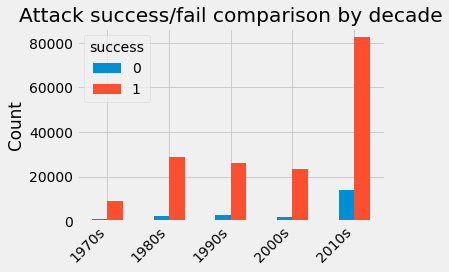

In [73]:
decades = 10 * (df.iyear // 10)
decades = decades.astype(str) + 's'
decades.name = 'decades'

print(df.groupby([decades, 'success'])['success'].count().unstack())

chart = df.groupby([decades, 'success'])['success'].count().unstack().plot.bar()
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Attack success/fail comparison by decade'), plt.ylabel('Count'), plt.xlabel('')
plt.tight_layout()

**Total attacks per Region**

Middle East & North Africa     53110
South Asia                     48266
Sub-Saharan Africa             19752
South America                  19292
Western Europe                 16843
Southeast Asia                 13363
Central America & Caribbean    10359
Eastern Europe                  5217
North America                   3579
East Asia                        808
Central Asia                     571
Australasia & Oceania            304
Name: region_txt, dtype: int64


Text(0.5,1,'distribution of attacks per "Region"')

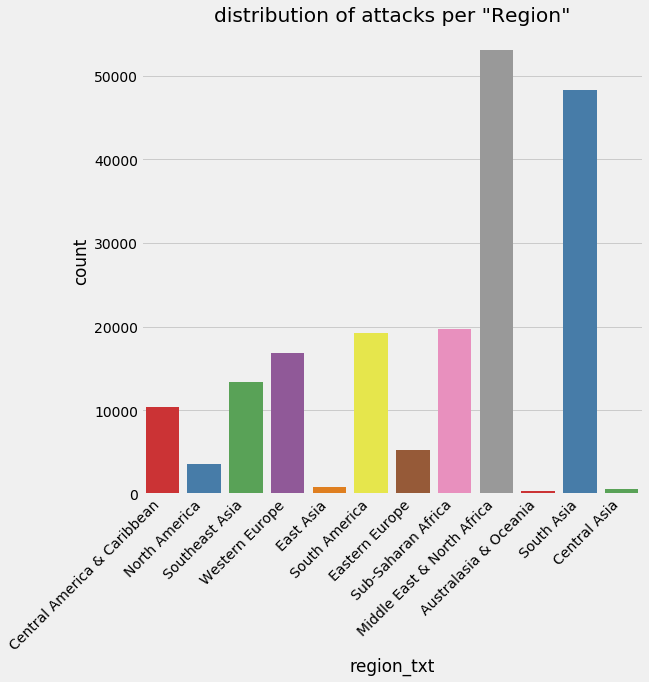

In [122]:
print(df.region_txt.value_counts().sort_values(ascending=False))

# countplot displaying count for each region
plt.figure(figsize=(8,8))
chart = sns.countplot(data=df, x='region_txt', palette='Set1') 
                                                            
# Because we don't want to change the labels themselves, we can just call get_xticklabels
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('distribution of attacks per "Region"')

**Total attacks per region per decade**

(Text(0.5,1,'Total attacks per region per Decade'),
 Text(0.5,0,''),
 Text(0,0.5,'Count'))

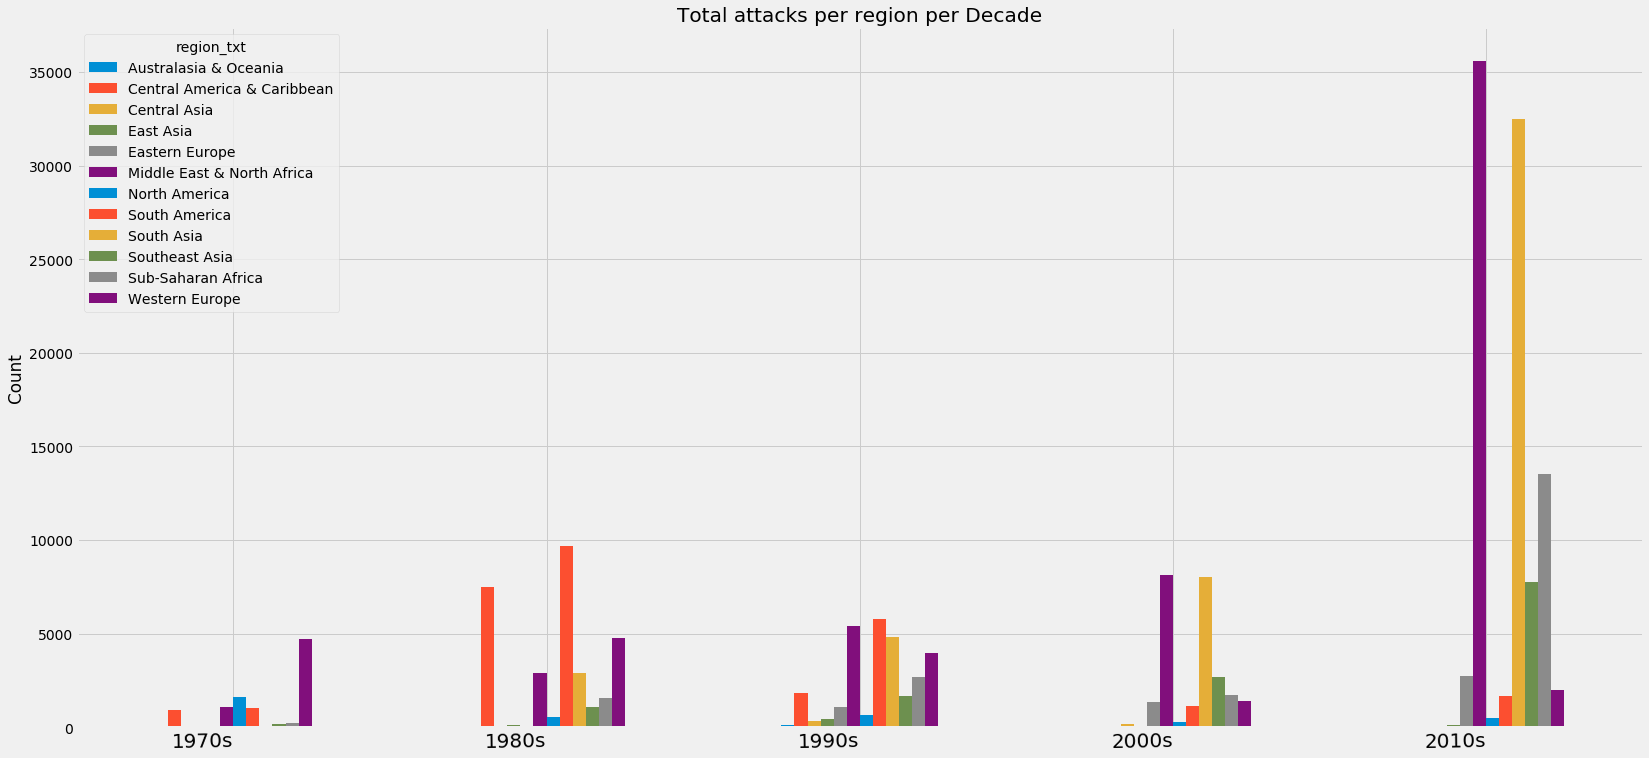

In [245]:
region_decade_attks = df.groupby([decades, 'region_txt'])['success'].count().unstack()

fig, ax = plt.subplots(figsize=(25, 12))
chart = region_decade_attks.plot.bar(ax=ax)
chart.set_xticklabels(chart.get_xticklabels(), rotation=1, fontsize=20, horizontalalignment='right')
plt.title('Total attacks per region per Decade'), plt.xlabel(''), plt.ylabel('Count')

**Trend of attack totals by Region**

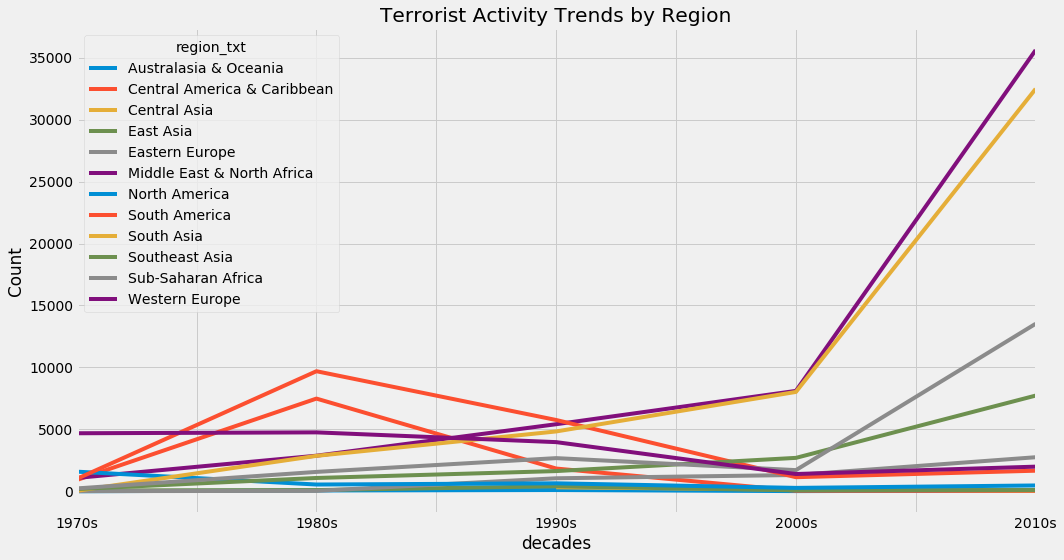

In [121]:
fig, ax = plt.subplots(figsize=(15, 8))
chart = df.groupby([decades, 'region_txt'])['region_txt'].count().unstack().plot(ax=ax)
plt.title('Terrorist Activity Trends by Region'), plt.ylabel('Count')
plt.tight_layout()

success                   region_txt  fail  success  tot_attks  \
5         Middle East & North Africa  6685    46425      53110   
8                         South Asia  6193    42073      48266   
10                Sub-Saharan Africa  1472    18280      19752   
7                      South America  1387    17905      19292   
11                    Western Europe  2517    14326      16843   
9                     Southeast Asia  1514    11849      13363   
1        Central America & Caribbean   368     9991      10359   
4                     Eastern Europe   716     4501       5217   
6                      North America   588     2991       3579   
3                          East Asia   127      681        808   
2                       Central Asia    60      511        571   
0              Australasia & Oceania    42      262        304   

success  region_success%  
5                  0.874  
8                  0.872  
10                 0.925  
7                  0.928  
11                 0.851  
9                  0.887  
1                  0.964  
4                  0.863  
6                  0.836  
3                  0.843  
2                  0.895  
0                  0.862

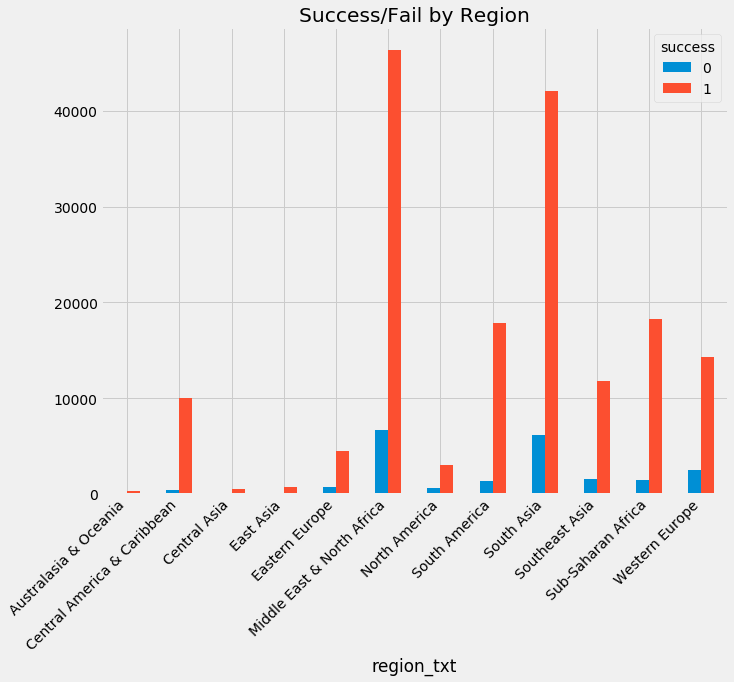

In [203]:
region_succ_outcome_grpby = df.groupby(['region_txt','success'])['success'].count().unstack()
region_succ_outcome_flat = region_succ_outcome_grpby.reset_index()
region_succ_outcome_flat.rename(columns={0:'fail', 1: 'success'}, inplace=True )

# Plot successful attacks vs unsuccessful attacks for every region
fig, ax = plt.subplots(figsize=(10, 8))
chart = region_succ_outcome_grpby.plot.bar(ax=ax)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Success/Fail by Region')

# calc success % per region
fail = region_succ_outcome_flat.fail
succ = region_succ_outcome_flat.success
region_succ_outcome_flat['tot_attks'] = tot = fail + succ
region_succ_outcome_flat['region_success%'] = round(succ / region_succ_outcome_flat['tot_attks'], 3)
region_succ_outcome_flat.sort_values('success', ascending=False)

**Percentage of successful attacks out of all attacks, by region.**

success                   region_txt  success%_of_all
5         Middle East & North Africa         0.242474
8                         South Asia         0.219744
10                Sub-Saharan Africa         0.095475
7                      South America         0.093516
11                    Western Europe         0.074823
9                     Southeast Asia         0.061886
1        Central America & Caribbean         0.052182
4                     Eastern Europe         0.023508
6                      North America         0.015622
3                          East Asia         0.003557
2                       Central Asia         0.002669
0              Australasia & Oceania         0.001368


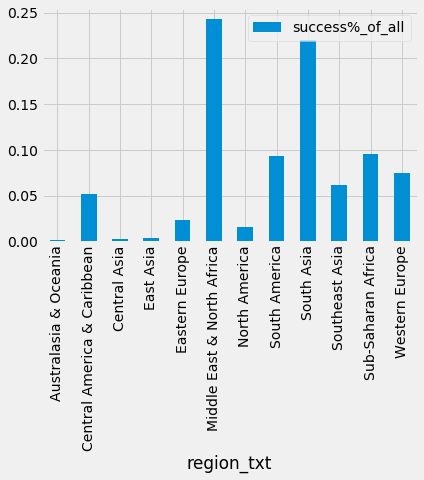

In [235]:
region_succ_outcome_flat

total_attacks = region_succ_outcome_flat['tot_attks'].sum()
total_attacks = int(total_attacks)
total_attacks

regional_succ_percentall = []
for i in region_succ_outcome_flat.success:
    i = i / total_attacks
    regional_succ_percentall.append(i)
    
region_succ_outcome_flat['success%_of_all'] = regional_succ_percentall

print(region_succ_outcome_flat[['region_txt', 'success%_of_all']].sort_values('success%_of_all', ascending=False))
region_succ_outcome_flat[['region_txt', 'success%_of_all']].plot(x='region_txt', y='success%_of_all', kind='bar')


**Outcome trends (success/fail) by decade for regions with extreme attack totals (outliers)**

Middle East & North Africa     53110
South Asia                     48266
Sub-Saharan Africa             19752
South America                  19292
Western Europe                 16843
Southeast Asia                 13363
Central America & Caribbean    10359
Eastern Europe                  5217
North America                   3579
East Asia                        808
Central Asia                     571
Australasia & Oceania            304
Name: region_txt, dtype: int64


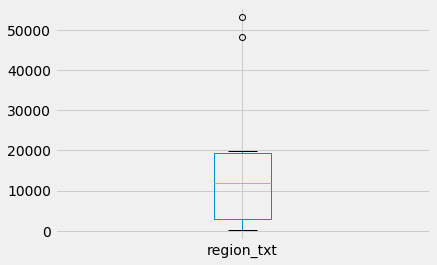

In [239]:
print(df.region_txt.value_counts())
df.region_txt.value_counts().plot.box()

_1. Middle East & North Africa_

success                  region_txt decades     0      1
23       Middle East & North Africa   1970s   148    942
24       Middle East & North Africa   1980s   389   2494
25       Middle East & North Africa   1990s   548   4875
26       Middle East & North Africa   2000s   442   7669
27       Middle East & North Africa   2010s  5158  30445


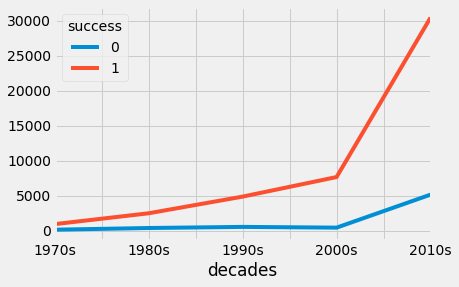

In [240]:
grpby_reg_dek_suc = df.groupby(['region_txt', decades,'success'])['success'].count().unstack().reset_index()
me_na = grpby_reg_dek_suc.loc[grpby_reg_dek_suc.region_txt == 'Middle East & North Africa', :]
print(me_na)

me_na_outcome_trend = me_na.set_index('decades').plot()
me_na_outcome_trend

_2. South Asia_

success  region_txt decades     0      1
38       South Asia   1970s     3     48
39       South Asia   1980s   161   2710
40       South Asia   1990s   305   4535
41       South Asia   2000s   427   7601
42       South Asia   2010s  5297  27179


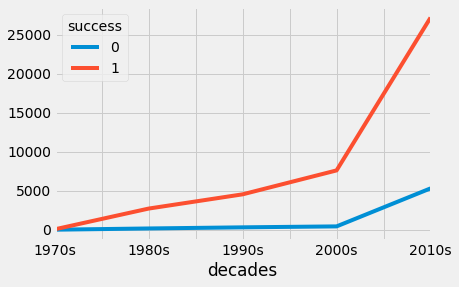

In [241]:
#grpby_reg_dek_suc = df.groupby(['region_txt', decades,'success'])['success'].count().unstack().reset_index()
south_asia = grpby_reg_dek_suc.loc[grpby_reg_dek_suc.region_txt == 'South Asia', :]
print(south_asia)

south_asia_outcome_trend = south_asia.set_index('decades').plot()
south_asia_outcome_trend

**Attack types Exploration**

Types of attacks and totals by decade

(Text(0.5,1,'Attack-type total by Decade'),
 Text(0.5,0,''),
 Text(0,0.5,'Count'))

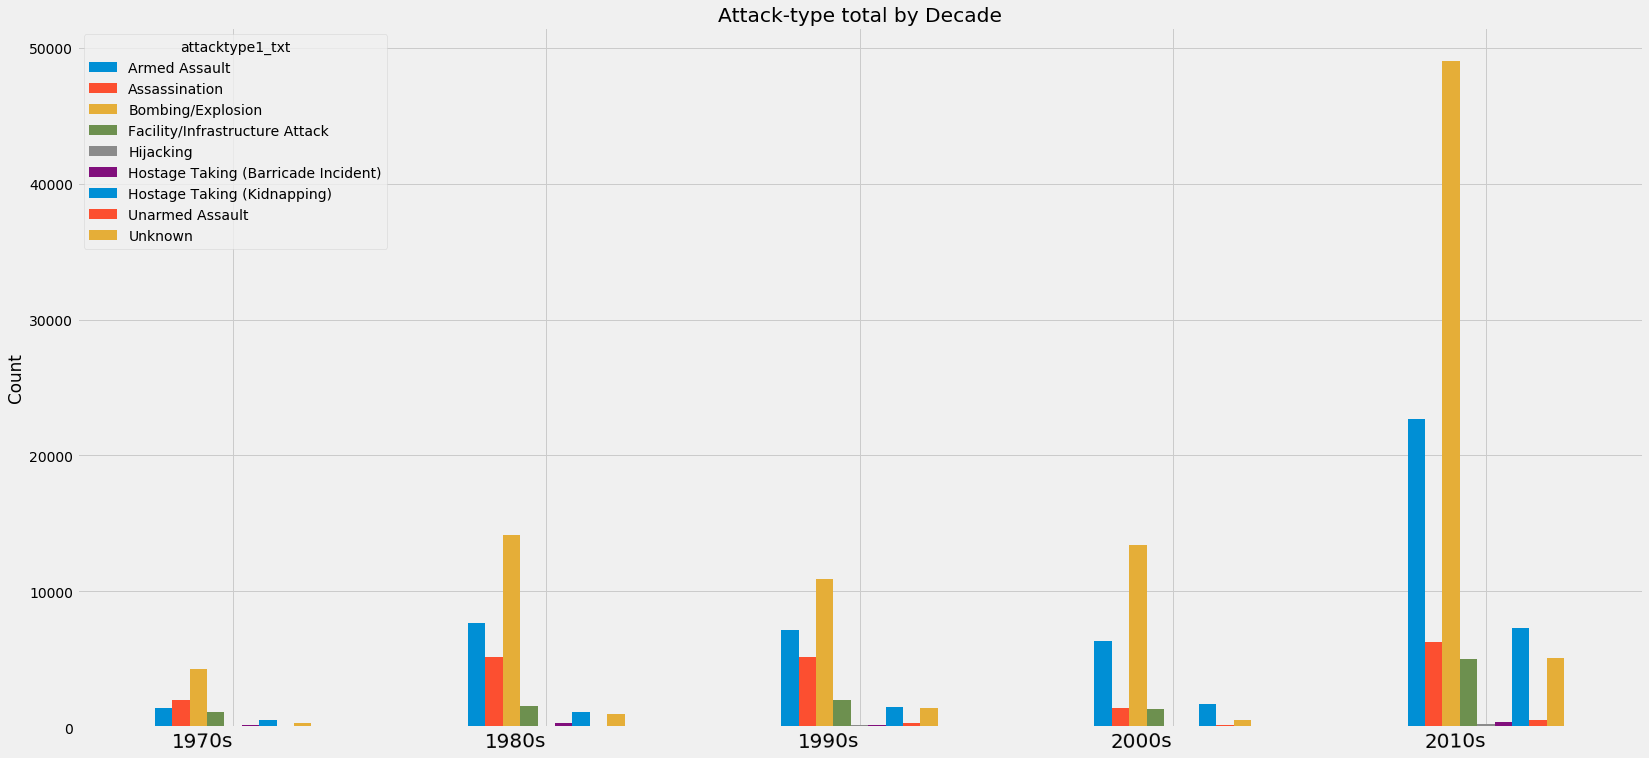

In [243]:
attktype_by_decade = df.groupby([decades, 'attacktype1_txt'])['success'].count().unstack().fillna(0)

fig, ax = plt.subplots(figsize=(25, 12))
chart = attktype_by_decade.plot.bar(ax=ax)
chart.set_xticklabels(chart.get_xticklabels(), rotation=1, fontsize=20, horizontalalignment='right')
plt.title('Attack-type total by Decade'), plt.xlabel(''), plt.ylabel('Count')

Weve just taken a birds-eye approach if you will, beginning with a world-wide snap shot of the overall trend in attacks by decade. From there we moved toward the potential target variable ("success") by looking at the numbers of success/fails as well as percentages by location.

df['targtype1_txt'].value_counts().sort_values(ascending=False)

targ_type_counts = df.targtype1.value_counts().sort_values(ascending=False)
targ_type_counts

orig_targ_idx

**Categoric to Categoric Exploration** (_bivariate continued_)

Lets look now at the relationship between success/target variable with other categorical variables of interest by creating a two-way table with the cross-tabulation function and then visualize totals with a graph. We will produce this for the following comparisons below:

1. success and attack type 
2. success and weapon-type
3. success and target type (victoms of attacks)

**Measure of Association:** Categoric and Categoric relationships (_bivariate continued_)

Finally we will follow with visualizing the measure of correlation/association among our categoric data using Cramer's V and Theil's U.

4. Cramer's V (_symmetric categorical variable correlation_)
5. Theil's U  (_asymmetric categorical variable correlation_)

    -The functions I used dor categoric correlation are from [dython](https://github.com/shakedzy/dython/tree/master/dython))
****************************

**(1) Success and Attack Type:** _counts and percentages_

success                                  0       1     All
attacktype1_txt                                           
Armed Assault                         2691   42560   45251
Assassination                         5004   15113   20117
Bombing/Explosion                    11358   80484   91842
Facility/Infrastructure Attack         606   10411   11017
Hijacking                               82     606     688
Hostage Taking (Barricade Incident)     10    1038    1048
Hostage Taking (Kidnapping)            265   11873   12138
Unarmed Assault                        146     950    1096
Unknown                               1507    6760    8267
All                                  21669  169795  191464


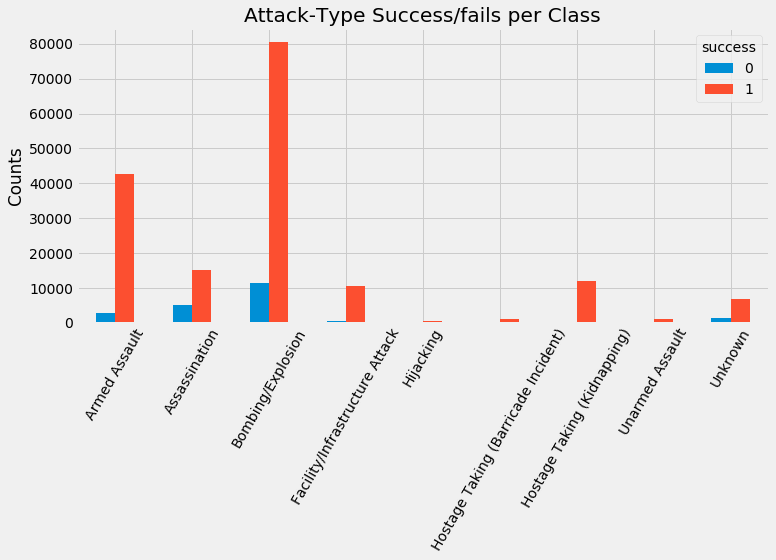

In [76]:
print(pd.crosstab(df.attacktype1_txt, df.success, margins=True, margins_name='All'))

fig, ax = plt.subplots(figsize=(11, 8))
pd.crosstab(df.attacktype1_txt, df.success).plot.bar(ax=ax)
fig.align_xlabels()
ax.tick_params(axis='x', rotation=60)
plt.title('Attack-Type Success/fails per Class'), plt.xlabel(''), plt.ylabel('Counts')
plt.tight_layout()

success                                  0      1    All
attacktype1_txt                                         
Armed Assault                        0.014  0.222  0.236
Assassination                        0.026  0.079  0.105
Bombing/Explosion                    0.059  0.420  0.480
Facility/Infrastructure Attack       0.003  0.054  0.058
Hijacking                            0.000  0.003  0.004
Hostage Taking (Barricade Incident)  0.000  0.005  0.005
Hostage Taking (Kidnapping)          0.001  0.062  0.063
Unarmed Assault                      0.001  0.005  0.006
Unknown                              0.008  0.035  0.043
All                                  0.113  0.887  1.000


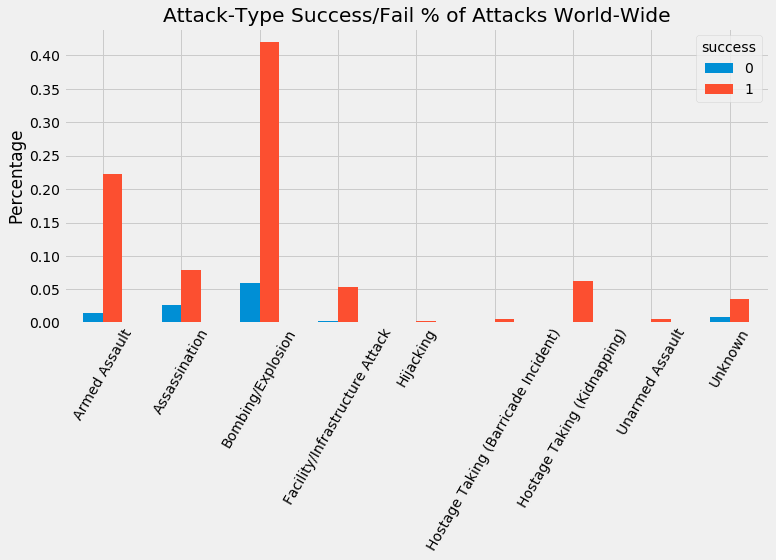

In [77]:
print(round(pd.crosstab(df.attacktype1_txt, df.success, margins=True, margins_name='All', normalize=True), 3))
outcome_by_attktype = round(pd.crosstab(df.attacktype1_txt, df.success, normalize=True), 3)

#yaxis 0-1
#outcome_by_attktype = round(pd.crosstab(df.attacktype1_txt, df.success, normalize=True, margins=True, margins_name='All'),3)

fig, ax = plt.subplots(figsize=(11,8))
outcome_by_attktype.plot.bar(ax=ax)
ax.tick_params(axis='x', rotation=60)
plt.title('Attack-Type Success/Fail % of Attacks World-Wide'), plt.xlabel(''), plt.ylabel('Percentage')
plt.tight_layout()

We see very clearly that the prefered type of terrorist attack spanning all boarders is by bomb.

   Questions we ask:
   
    1. What percentage of attacks by bomb make up attacks world wide? and by large disparity relative to their success % of total successes?
    2. what type of attacks account for the second and third-most number of attacks?
    
Shown in the table we can conclude that out of every attack accounted for by the GTD database, **attacks by bomb make up close to half of all attacks world-wide at 48% of all attacks**, a **wide disparity in terms of the percentage of total attacks** considering the type of attack that makes up the **second-most is armed assault at 23.6% and assassination 3rd, at 10.5%**

Lets visualize success and fails attack-types in another form, with a boxplot and or violinplot. We will look to their **Distributions and quartiles of Attack outcome given type of attack**.

> A violin plot is a method of plotting numeric data. It is similar to a box plot, with the addition of a rotated kernel density plot on each side. ... While a box plot only shows summary statistics such as mean/median and interquartile ranges, the violin plot shows the full distribution of the data.[wikipedia](https://en.wikipedia.org/wiki/Violin_plot)

Text(0.5,1,'success vs attacktype1_txt')

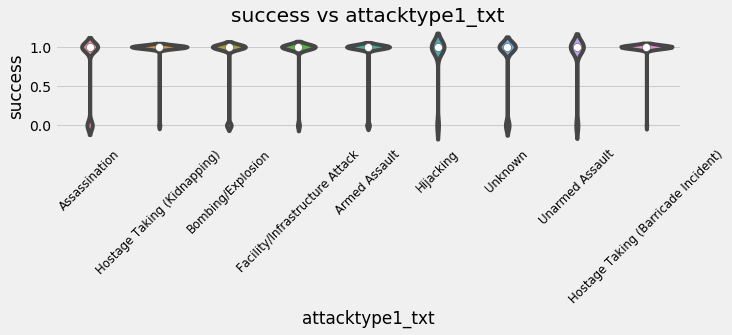

In [79]:
fig, ax = plt.subplots(figsize = (10, 2))
sns.violinplot(x= 'attacktype1_txt', y= 'success', data=df)
ax.tick_params(axis='x', labelsize='small', rotation=45)
plt.title('success vs attacktype1_txt')

**What we gather from our bivariate analysis involving our target variable success and types of attacks:**

- Total Attacks: **_Bombing/Explosion_ and _Armed Assault_ account for 71.6% of all attacks. Bombing at 48% Armed Assault at 23.6% respectively.** Assasination comes in third at 10.5% of all attacks.

- Successful Attacks: **Bombing/Explosion accounts for 42% of successful attacks and Armed Assault accounts for 22.2%.**

*****

**(2) Success and Weapon Type:** counts and percentages (_bivariate continued_)

We will do essentially the same analysis looking at relationships among target variable success just now with another interesting variable, "weaptype1_txt" which represents a categorical variable containing classes of different types of weapons used given each attack.

In [268]:
df.loc[df.weaptype1_txt == 'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)', 'weaptype1_txt'] = 'vehicle (non-explosive)'

success                      0       1     All
weaptype1_txt                                 
Biological                  20      15      35
Chemical                    79     257     336
Explosives               13439   82968   96407
Fake Weapons                15      18      33
Firearms                  4944   56941   61885
Incendiary                 706   11085   11791
Melee                      389    3516    3905
Other                       25     102     127
Radiological                12       1      13
Sabotage Equipment           8     150     158
Unknown                   2005   14616   16621
vehicle (non-explosive)     27     126     153
All                      21669  169795  191464


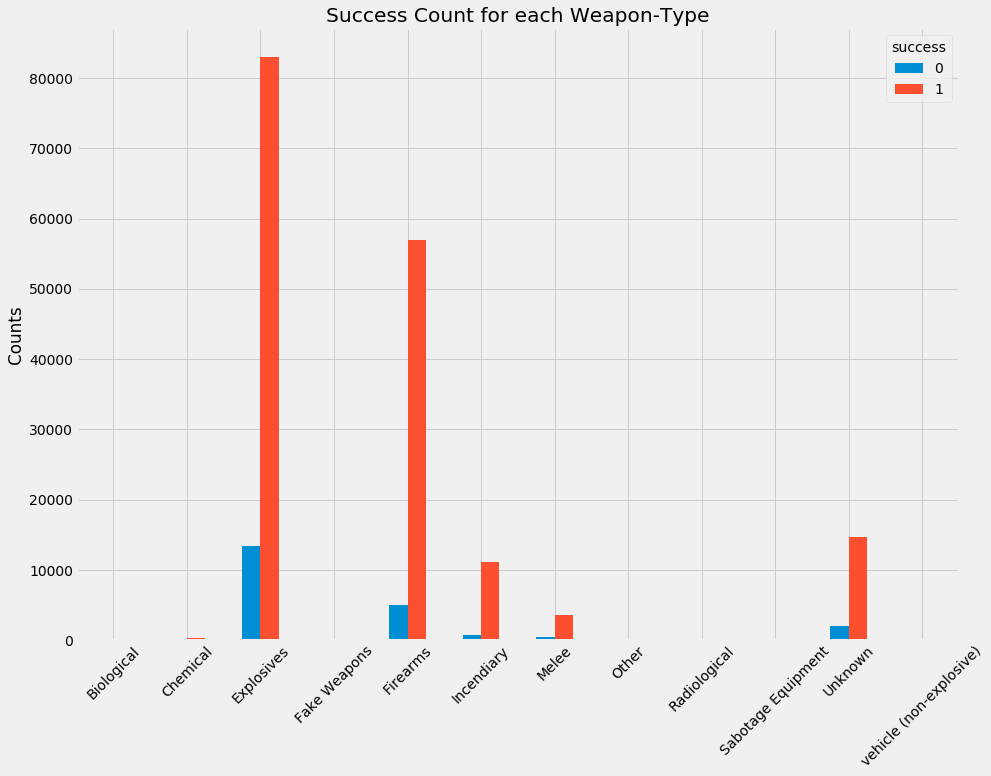

In [269]:
print(pd.crosstab(df.weaptype1_txt, df.success, margins=True, margins_name='All'))

fig, ax = plt.subplots(figsize=(14, 11))
pd.crosstab(df.weaptype1_txt, df.success).plot.bar(ax=ax)
ax.tick_params(axis='x', rotation=45)
plt.title('Success Count for each Weapon-Type'), plt.xlabel(''), plt.ylabel('Counts')
plt.tight_layout()

success                      0      1    All
weaptype1_txt                               
Biological               0.000  0.000  0.000
Chemical                 0.000  0.001  0.002
Explosives               0.070  0.433  0.504
Fake Weapons             0.000  0.000  0.000
Firearms                 0.026  0.297  0.323
Incendiary               0.004  0.058  0.062
Melee                    0.002  0.018  0.020
Other                    0.000  0.001  0.001
Radiological             0.000  0.000  0.000
Sabotage Equipment       0.000  0.001  0.001
Unknown                  0.010  0.076  0.087
vehicle (non-explosive)  0.000  0.001  0.001
All                      0.113  0.887  1.000


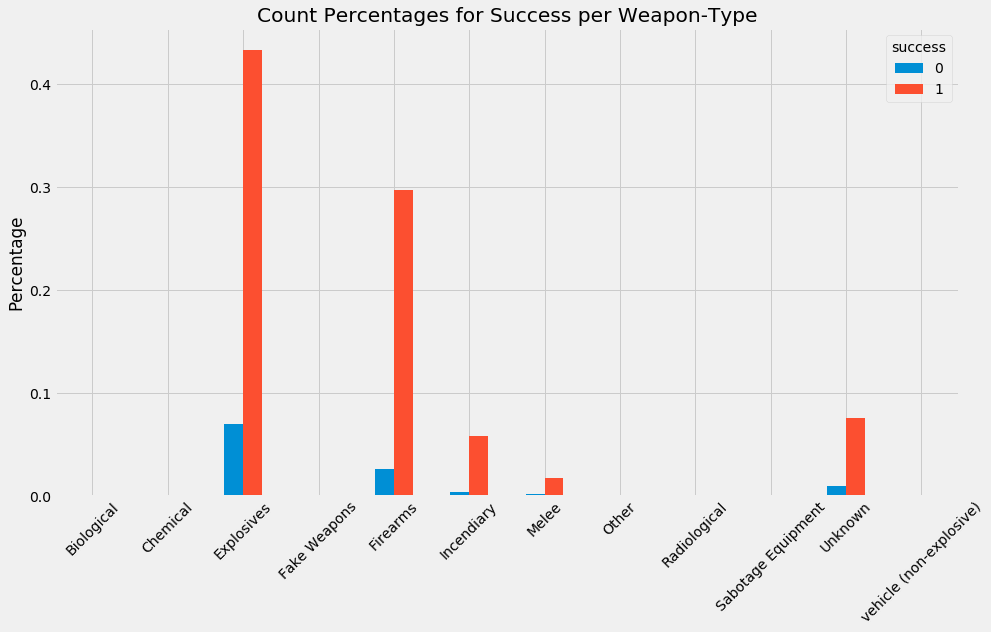

In [270]:
print(round(pd.crosstab(df.weaptype1_txt, df.success, margins=True, margins_name='All', normalize=True), 3))
outcome_by_weaptype = round(pd.crosstab(df.weaptype1_txt, df.success, normalize=True), 3)

#yaxis 0-1
#outcome_by_weaptype = round(pd.crosstab(df.weaptype1_txt, df.success, normalize=True, margins=True, margins_name='All'),3)

fig, ax = plt.subplots(figsize=(14,9))
outcome_by_weaptype.plot.bar(ax=ax)
ax.tick_params(axis='x', rotation=45)
plt.title('Count Percentages for Success per Weapon-Type'), plt.xlabel(''), plt.ylabel('Percentage')
plt.tight_layout()

Text(0.5,1,'success vs weaptype1_txt')

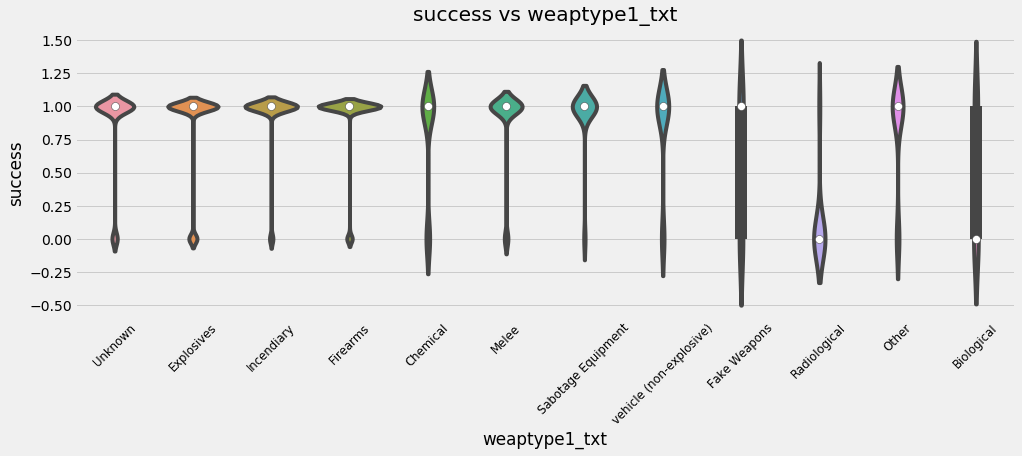

In [271]:
fig, ax = plt.subplots(figsize = (15, 5))
sns.violinplot(x= 'weaptype1_txt', y= 'success', data=df)
ax.tick_params(axis='x', labelsize='small', rotation=45)
plt.title('success vs weaptype1_txt')

*******************************
**(3) Success and Target Type (_victom of attack_):** counts and percentages (_bivariate continued_)

success                             0       1     All
targtype1_txt                                        
Abortion Related                   43     222     265
Airports & Aircraft               215    1148    1363
Business                         1468   19809   21277
Educational Institution           402    4098    4500
Food or Water Supply               32     298     330
Government (Diplomatic)           605    3059    3664
Government (General)             3538   18736   22274
Journalists & Media               338    2734    3072
Maritime                           45     326     371
Military                         3141   26837   29978
NGO                                60     960    1020
Other                              14     134     148
Police                           2411   23612   26023
Private Citizens & Property      3131   43152   46283
Religious Figures/Institutions    378    4315    4693
Telecommunication                  62     990    1052
Terrorists/Non-State Militia

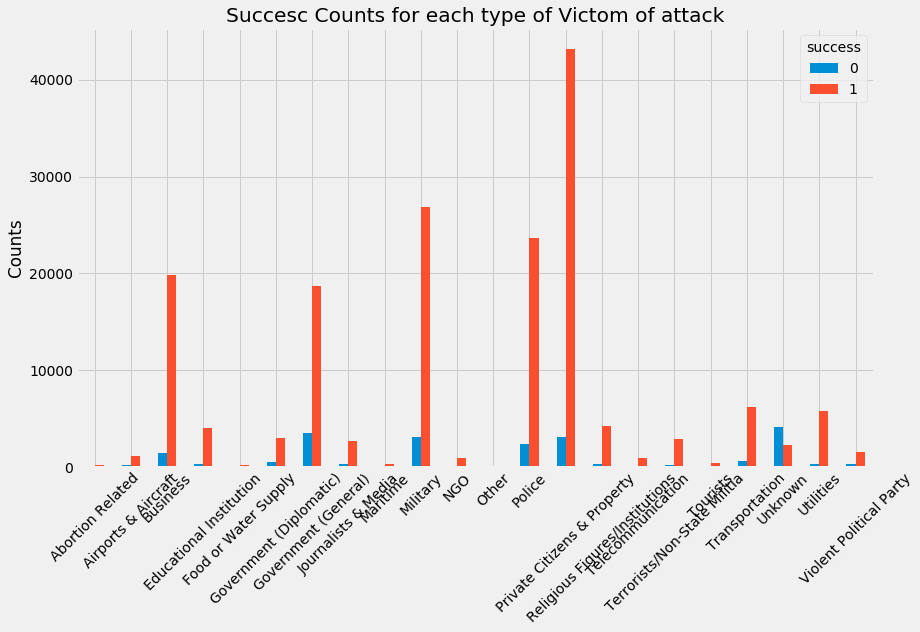

In [272]:
print(pd.crosstab(df.targtype1_txt, df.success, margins=True, margins_name='All'))

fig, ax = plt.subplots(figsize=(13, 9))
pd.crosstab(df.targtype1_txt, df.success).plot.bar(ax=ax)
ax.tick_params(axis='x', rotation=45)
plt.title('Succesc Counts for each type of Victom of attack'), plt.xlabel(''), plt.ylabel('Counts')
plt.tight_layout()

success                             0      1    All
targtype1_txt                                      
Abortion Related                0.000  0.001  0.001
Airports & Aircraft             0.001  0.006  0.007
Business                        0.008  0.103  0.111
Educational Institution         0.002  0.021  0.024
Food or Water Supply            0.000  0.002  0.002
Government (Diplomatic)         0.003  0.016  0.019
Government (General)            0.018  0.098  0.116
Journalists & Media             0.002  0.014  0.016
Maritime                        0.000  0.002  0.002
Military                        0.016  0.140  0.157
NGO                             0.000  0.005  0.005
Other                           0.000  0.001  0.001
Police                          0.013  0.123  0.136
Private Citizens & Property     0.016  0.225  0.242
Religious Figures/Institutions  0.002  0.023  0.025
Telecommunication               0.000  0.005  0.005
Terrorists/Non-State Militia    0.001  0.015  0.017
Tourists    

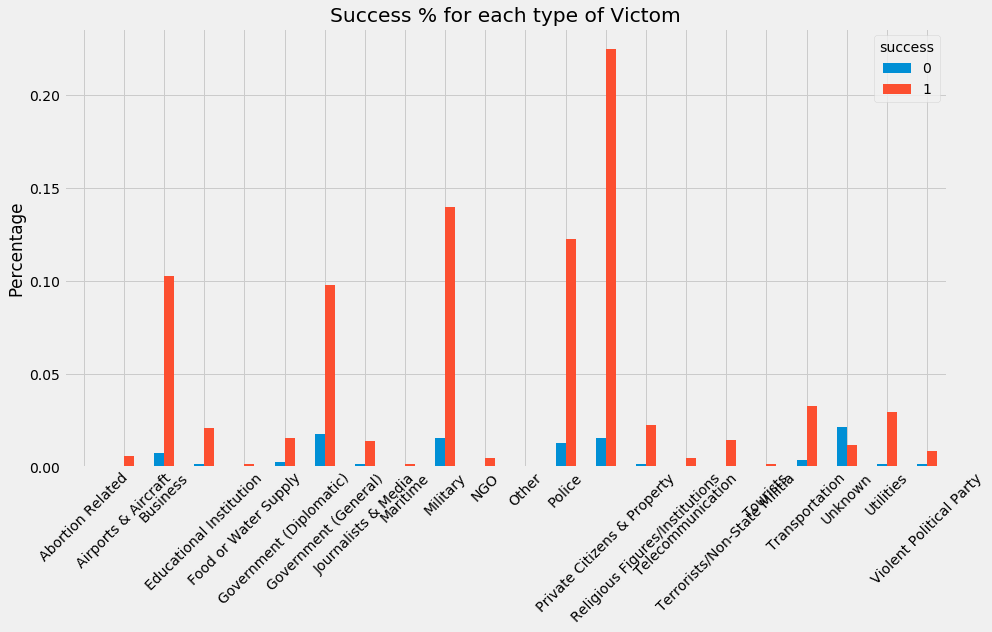

In [273]:
print(round(pd.crosstab(df.targtype1_txt, df.success, margins=True, margins_name='All', normalize=True), 3))
outcome_per_victom = round(pd.crosstab(df.targtype1_txt, df.success, normalize=True),3)

#yaxis 0-1
#outcome_per_victom = round(pd.crosstab(df.targtype1_txt, df.success, normalize=True, margins=True, margins_name='All'),3)

fig, ax = plt.subplots(figsize=(14,9))
outcome_per_victom.plot.bar(ax=ax)
ax.tick_params(axis='x', rotation=45)
plt.title('Success % for each type of Victom'), plt.xlabel(''), plt.ylabel('Percentage')
plt.tight_layout()

**A different look:**
- Grouping by Success/Fail only, as apposed to individual types of victoms. In this plot, the target-types then become the individual bars.

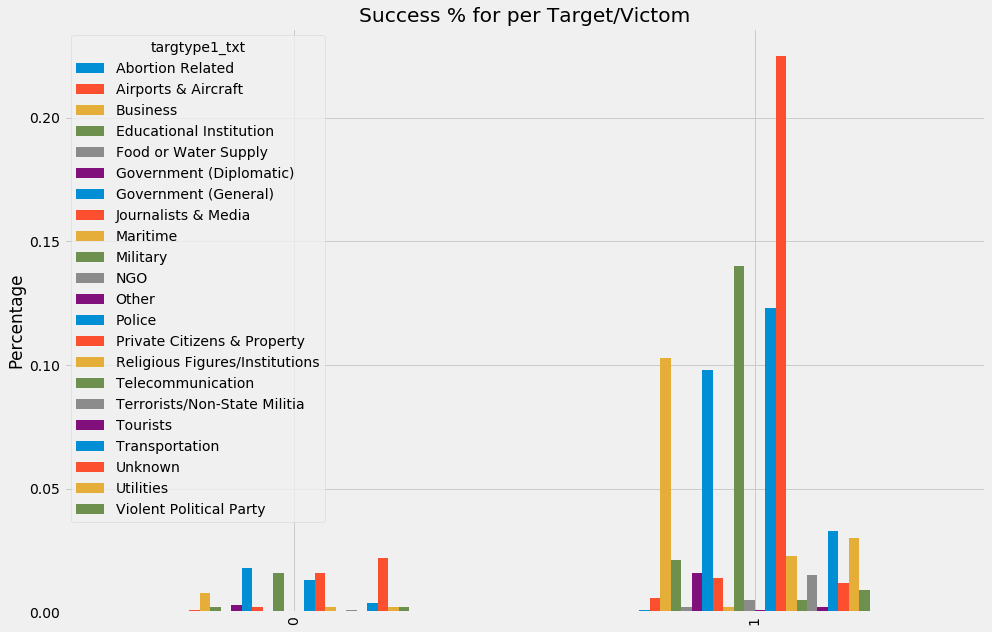

In [274]:
round(pd.crosstab(df.success, df.targtype1_txt, margins=True, margins_name='All', normalize=True), 3)
outcome_per_victom = round(pd.crosstab(df.success, df.targtype1_txt, normalize=True),3)

#yaxis 0-1
#outcome_per_victom = round(pd.crosstab(df.targtype1_txt, df.success, normalize=True, margins=True, margins_name='All'),3)

fig, ax = plt.subplots(figsize=(14,9))
outcome_per_victom.plot.bar(ax=ax)
#ax.tick_params(axis='x', rotation=45)
plt.title('Success % for per Target/Victom'), plt.xlabel(''), plt.ylabel('Percentage')
plt.tight_layout()

Text(0.5,1,'success vs targtype1_txt')

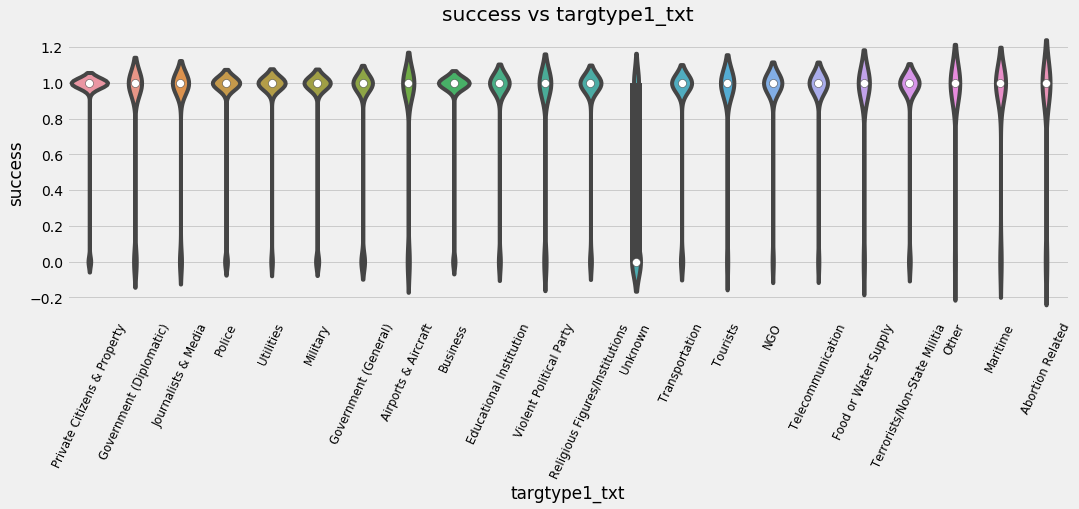

In [275]:
fig, ax = plt.subplots(figsize = (16, 5))
sns.violinplot(x= 'targtype1_txt', y= 'success', data=df)
ax.tick_params(axis='x', labelsize='small', rotation=65)
plt.title('success vs targtype1_txt')

**(4) Cramer's V:** Symmetric categorical variable correlation

In [276]:
def cramers_v(x, y):
    error_matrix = pd.crosstab(x,y) # confusion_matrix
    chi2 = scipy.stats.chi2_contingency(error_matrix)[0]
    num = error_matrix.sum().sum()
    phi2 = chi2/num
    rows, cols = error_matrix.shape
    phi2corr = max(0, phi2-((cols-1)*(rows-1))/(num-1))
    row_corr = rows-((rows-1)**2)/(num-1)
    col_corr = cols-((cols-1)**2)/(num-1)
    return np.sqrt(phi2corr/min((col_corr-1),(row_corr-1)))

print('Cramers V association (0-1) for Attack-type and Target:\n {}'.format(round(cramers_v(df.attacktype1_txt, df.success), 4)))
print('Cramers V association (0-1) for Weapon-type and Target:\n {}'.format(round(cramers_v(df.weaptype1_txt, df.success),4)))
print('Cramers V association (0-1) for Target-type and Target:\n {}'.format(round(cramers_v(df.targtype1_txt, df.success),4)))
print('Cramers V association (0-1) for Hostage-Outcome and Target:\n {}'.format(round(cramers_v(df.hostage_outcome_txt, df.success),4)))
print('Cramers V association (0-1) for Target-entity (corporation/government) and Target:\n {}'.format(round(cramers_v(df.targ_corpgov1, df.success),4)))
print('Cramers V association (0-1) for Specific Target (person/place) and Target:\n {}'.format(round(cramers_v(df.targ_specfc1, df.success),4)))
print('Cramers V association (0-1) for Target Nationality and Target:\n {}'.format(round(cramers_v(df.targ_natlty1_txt, df.success),4)))
print('Cramers V association (0-1) for claimed attacks and Target:\n {}'.format(round(cramers_v(df.responsibility_claimed, df.success),4)))
print('Cramers V association (0-1) for type of claim and Target:\n {}'.format(round(cramers_v(df.claim_type_txt, df.success),4)))
print('Cramers V association (0-1) for multiple terror-group claims and Target:\n {}'.format(round(cramers_v(df.responsibility_claim_multiple, df.success),4)))
print('Cramers V association (0-1) for Terror-group and Target:\n {}'.format(round(cramers_v(df.terr_grp, df.success),4)))
print('Cramers V association (0-1) for additional terror-group claim and Target:\n {}'.format(round(cramers_v(df.terr_grp2, df.success),4)))
print('Cramers V association (0-1) for 3rd terror-group claim and Target:\n {}'.format(round(cramers_v(df.terr_grp3, df.success),4)))
print('Cramers V association (0-1) for property damage and Target:\n {}'.format(round(cramers_v(df.property_damage_txt, df.success),4)))
print('Cramers V association (0-1) for International attack and Target:\n {}'.format(round(cramers_v(df.International_attk, df.success),4)))
print('Cramers V association (0-1) for connected attack and Target:\n {}'.format(round(cramers_v(df.connctd_attk, df.success),4)))

Cramers V association (0-1) for Attack-type and Target:
 0.1908
Cramers V association (0-1) for Weapon-type and Target:
 0.1009
Cramers V association (0-1) for Target-type and Target:
 0.3263
Cramers V association (0-1) for Hostage-Outcome and Target:
 0.1495
Cramers V association (0-1) for Target-entity (corporation/government) and Target:
 0.2716
Cramers V association (0-1) for Specific Target (person/place) and Target:
 0.3274
Cramers V association (0-1) for Target Nationality and Target:
 0.1536
Cramers V association (0-1) for claimed attacks and Target:
 0.0556
Cramers V association (0-1) for type of claim and Target:
 0.0983
Cramers V association (0-1) for multiple terror-group claims and Target:
 0.0088
Cramers V association (0-1) for Terror-group and Target:
 0.1681
Cramers V association (0-1) for additional terror-group claim and Target:
 0.3718
Cramers V association (0-1) for 3rd terror-group claim and Target:
 0.2592
Cramers V association (0-1) for property damage and Target

The only problem with Cramer's V, is it is a symetric, meaning it wont respond or take into account swapping x and y which means that if the value of "x" is known, the y value cant be determined but if the y value is known then we are sure of the x value. Considering this, we need an asymmetric measure of association which we will do below with **Theil's U**.

Theil's U statistic (Uncertainty coefficient) for categorical-categorical association. This is the uncertainty of x given y: value is on the range of [0,1] - where 0 means y provides no information about x, and 1 means y provides full information about x. This is an asymmetric coefficient: U(x,y) != U(y,x)

*****************

**(5) Theil's U:** Asymmetric categorical variable correlation

In [277]:
import collections
import math

def conditional_entropy(x, y): # nan_strategy=REPLACE, nan_replace_value=DEFAULT_REPLACE_VALUE
    
    y_counter = collections.Counter(y)
    xy_counter = collections.Counter(list(zip(x, y)))
    total_occurrences = sum(y_counter.values())
    entropy = 0.0
    for xy in xy_counter.keys():
        p_xy = xy_counter[xy] / total_occurrences
        p_y = y_counter[xy[1]] / total_occurrences
        entropy += p_xy * math.log(p_y / p_xy)
    return entropy

def theils_u(x, y):
    s_xy = conditional_entropy(x,y)
    x_counter = collections.Counter(x)
    total_occurrences = sum(x_counter.values())
    p_x = list(map(lambda n: n/total_occurrences, x_counter.values()))
    s_x = scipy.stats.entropy(p_x)
    if s_x == 0:
        return 1
    else:
        return (s_x - s_xy) / s_x

In [278]:
#Unsure of which variable needs to be X and y with Theil's U: see different outputs for reversed order below.
print(theils_u(df.success, df.attacktype1_txt))
theils_u(df.attacktype1_txt, df.success)

0.051286630569314644


0.012209938814454193

In [279]:
print('Theils U calculation for Attack-type and Target:\n {}'.format(round(theils_u(df.attacktype1_txt, df.success), 4)))
print('Theils U calculation for Weapon-type and Target:\n {}'.format(round(theils_u(df.weaptype1_txt, df.success),4)))
print('Theils U calculation for Target-type and Target:\n {}'.format(round(theils_u(df.targtype1_txt, df.success),4)))
print('Theils U calculation for Hostage-Outcome and Target:\n {}'.format(round(theils_u(df.hostage_outcome_txt, df.success),4)))
print('Theils U calculation for Target-entity (corporation/government) and Target:\n {}'.format(round(theils_u(df.targ_corpgov1, df.success),4)))
print('Theils U calculation for Specific Target (person/place) and Target:\n {}'.format(round(theils_u(df.targ_specfc1, df.success),4)))
print('Theils U calculation for Target Nationality and Target:\n {}'.format(round(theils_u(df.targ_natlty1_txt, df.success),4)))

Theils U calculation for Attack-type and Target:
 0.0122
Theils U calculation for Weapon-type and Target:
 0.0042
Theils U calculation for Target-type and Target:
 0.0145
Theils U calculation for Hostage-Outcome and Target:
 0.02
Theils U calculation for Target-entity (corporation/government) and Target:
 0.0172
Theils U calculation for Specific Target (person/place) and Target:
 0.0229
Theils U calculation for Target Nationality and Target:
 0.0039


**Numeric to Numeric Exploration** (_bivariate continued_)

Because our potential target is categoric in type, we've up until now have focused pretty much all on categorical data in regards to exploring relationships and visualizing them. Lets begin taking a look at our numeric data by looking at the correlations.

In [280]:
#df_nums = df.select_dtypes(exclude='object')
#print(df_nums.shape)

num_cols.shape

(191464, 74)

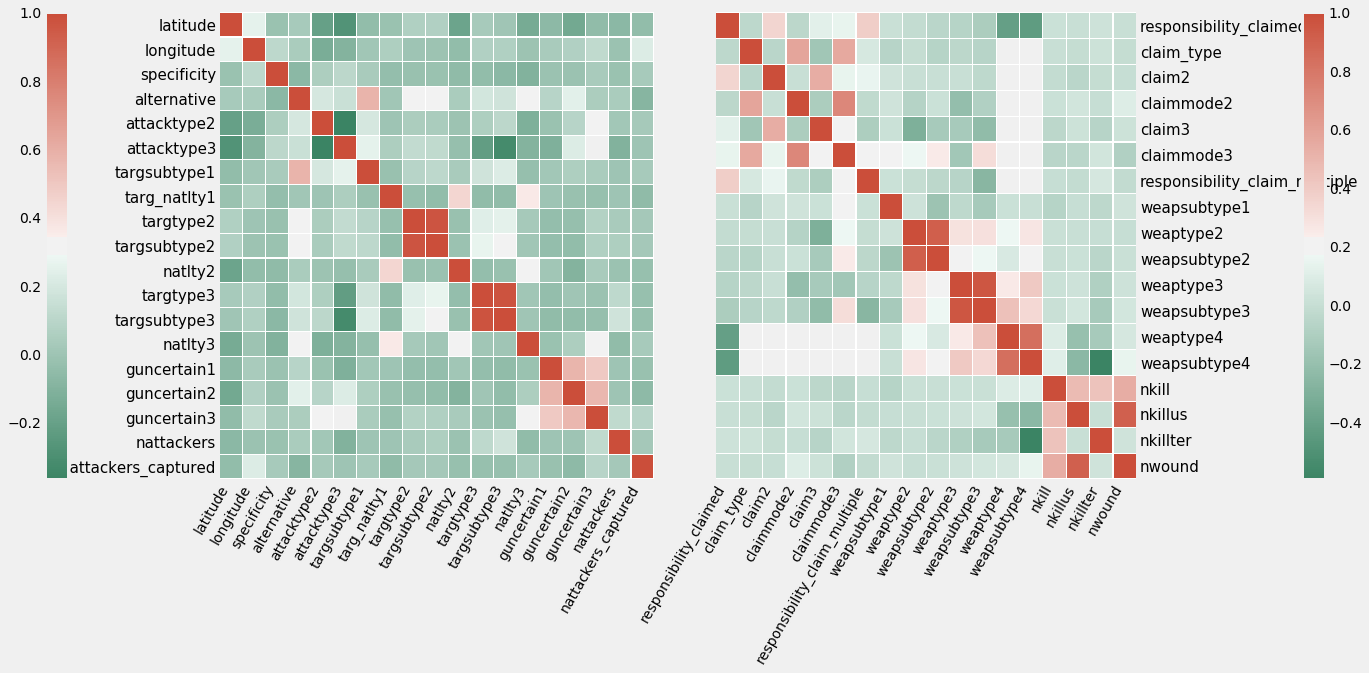

In [281]:
num_cols1 = num_cols.iloc[:, :19]
num_cols2 = num_cols.iloc[:, 19:37]
num_corr1 = num_cols1.corr()             
num_corr2 = num_cols2.corr()

#plot numeric cols
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(23,8))
fig.subplots_adjust(wspace=0.09)
colormap = sns.diverging_palette(150, 17, as_cmap=True)
# num_corr1
chart0 = sns.heatmap(num_corr1, ax=ax0, cbar=False, cmap=colormap, linewidths=0.12)
fig.colorbar(ax0.collections[0], ax=ax0, location="left", use_gridspec=False, pad=0.22)
chart0.set_xticklabels(chart0.get_xticklabels(), fontsize=14, horizontalalignment='right')
chart0.set_yticklabels(chart0.get_yticklabels(), fontsize=15)
# num_corr2
chart1 = sns.heatmap(num_corr2, ax=ax1, cbar=False, cmap=colormap, linewidths=0.12 )
fig.colorbar(ax1.collections[0], ax=ax1, location="right", use_gridspec=False, pad=0.24)
chart1.set_xticklabels(chart1.get_xticklabels(), fontsize=14, horizontalalignment='right')
chart1.set_yticklabels(chart1.get_yticklabels(), fontsize=15)

ax0.tick_params(axis='x', rotation=60)
ax1.yaxis.tick_right()
ax1.tick_params(axis='x', rotation=60)
ax1.tick_params(axis='y', rotation=0)

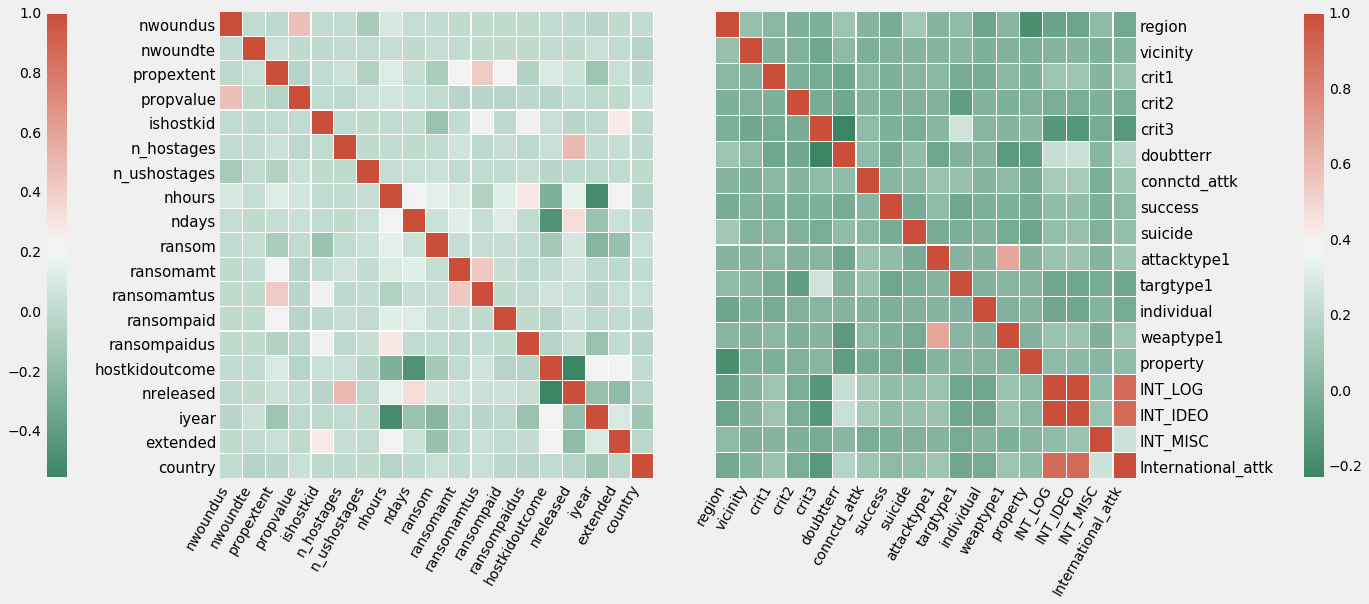

In [283]:
num_cols3 = num_cols.iloc[:, 37:56]
num_cols4 = num_cols.iloc[:, 56:]
num_corr3 = num_cols3.corr()               
num_corr4 = num_cols4.corr()

#plot
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(23, 8)) 
fig.subplots_adjust(wspace=0.09)
colormap = sns.diverging_palette(150, 17, as_cmap=True)
#num_corr3
chart3 = sns.heatmap(num_corr3, ax=ax0, cbar=False, cmap=colormap, linewidths=0.12)
fig.colorbar(ax0.collections[0], ax=ax0, location="left", use_gridspec=False, pad=0.22)
chart3.set_xticklabels(chart3.get_xticklabels(), fontsize=14, horizontalalignment='right')
chart3.set_yticklabels(chart3.get_yticklabels(), fontsize=15)
# num_corr4
chart4 = sns.heatmap(num_corr4, ax=ax1, cbar=False, cmap=colormap, linewidths=0.12)
fig.colorbar(ax1.collections[0], ax=ax1, location="right", use_gridspec=False, pad=0.24)
chart4.set_xticklabels(chart4.get_xticklabels(), fontsize=14, horizontalalignment='right')
chart4.set_yticklabels(chart4.get_yticklabels(), fontsize=15)

ax0.tick_params(axis='x', rotation=60)
ax1.yaxis.tick_right()
ax1.tick_params(axis='x', rotation=60)
ax1.tick_params(axis='y', rotation=0)

**Correlation with Target**

In [284]:
targ_corr_positive = df.corr()['success'].sort_values(ascending=False)
targ_corr_negative = df.corr()['success'].sort_values(ascending=True)

print(targ_corr_positive.head(15))
print('-------------------------')
print(targ_corr_negative.head(15))

success         1.000000
weapsubtype4    0.107014
weapsubtype3    0.086203
targsubtype3    0.080254
extended        0.076344
targtype3       0.071338
weaptype3       0.060732
attacktype3     0.060709
INT_LOG         0.058132
INT_IDEO        0.057461
targtype2       0.056187
nkill           0.053922
attacktype2     0.051341
attacktype1     0.047299
targsubtype2    0.042762
Name: success, dtype: float64
-------------------------
claim3         -0.183395
iyear          -0.086945
weapsubtype1   -0.078955
latitude       -0.071452
targtype1      -0.061876
longitude      -0.052875
weaptype4      -0.039597
country        -0.037320
natlty3        -0.033947
property       -0.033144
suicide        -0.030329
doubtterr      -0.029933
region         -0.028972
claimmode2     -0.028788
claimmode3     -0.027340
Name: success, dtype: float64


**Next Steps, now that we have done some exploration of variables**
- Deal with collinear variables in effort to reduce computation costs
- Deal with missing values
- Deal with outliers
- Feature Engineering
    - Variable transformation
    - Variable creation

**Remove highly collinear variables**

In [285]:
corr_matrix = df.corr()

#Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

In [286]:
#Find index of variables with correlation greater than 0.95
to_drop = [c for c in upper.columns if any(upper[c] > 0.95)]
print('Variables with extremely high correlation (>95%) that will be removed from dataset:\n\n ' + str(to_drop) + '.\n')

Variables with extremely high correlation (>95%) that will be removed from dataset:

 ['targsubtype1', 'targsubtype2', 'targsubtype3', 'weapsubtype3', 'weapsubtype4', 'ndays', 'INT_IDEO'].



              targtype1  targsubtype1
targtype1      1.000000      0.982384
targsubtype1   0.982384      1.000000


Text(0.5,1,'targtype1 and targsubtype correlation')

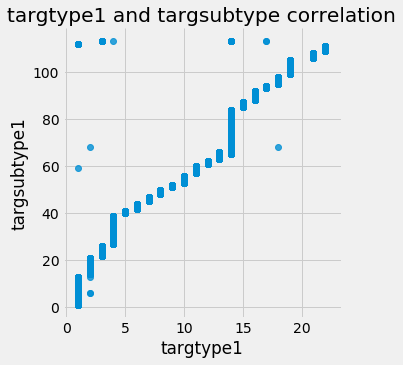

In [287]:
# determine variable thats highly correlated with "targsubtype1"
print(corr_matrix.loc[corr_matrix['targsubtype1'] > 0.9, corr_matrix['targsubtype1'] > 0.9])

sns.lmplot('targtype1', 'targsubtype1', data=df, fit_reg=False)
plt.title('targtype1 and targsubtype correlation')

              targtype2  targsubtype2  weapsubtype4
targtype2      1.000000      0.972578           1.0
targsubtype2   0.972578      1.000000           1.0
weapsubtype4   1.000000      1.000000           1.0


Text(0.5,1,'targtype2 versus targsubtype2')

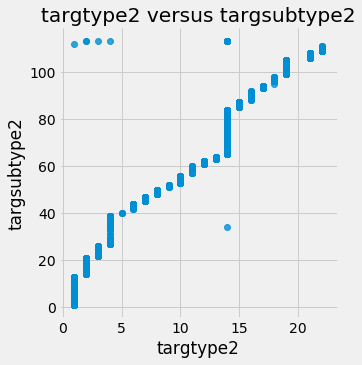

In [288]:
# determine variable thats highly correlated with "targsubtype2"
print(corr_matrix.loc[corr_matrix['targsubtype2'] > 0.9, corr_matrix['targsubtype2'] > 0.9])

sns.lmplot('targtype2', 'targsubtype2', data=df, fit_reg=False)
plt.title('targtype2 versus targsubtype2')

              targtype3  targsubtype3
targtype3      1.000000      0.974246
targsubtype3   0.974246      1.000000


Text(0.5,1,'targtype3 and targsubtype3')

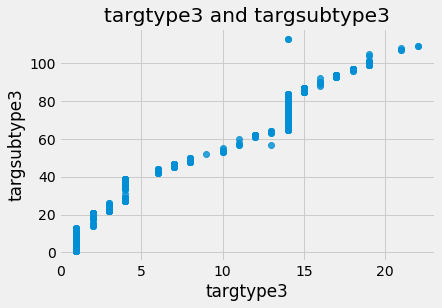

In [289]:
# determine variable thats highly correlated with "targsubtype3"
print(corr_matrix.loc[corr_matrix['targsubtype3'] > 0.9, corr_matrix['targsubtype3'] > 0.9])

sns.regplot('targtype3', 'targsubtype3', data=df, fit_reg=False)
plt.title('targtype3 and targsubtype3')

              weaptype3  weapsubtype3
weaptype3       1.00000       0.95695
weapsubtype3    0.95695       1.00000


Text(0.5,1,'weaptype3 and weapsubtype3')

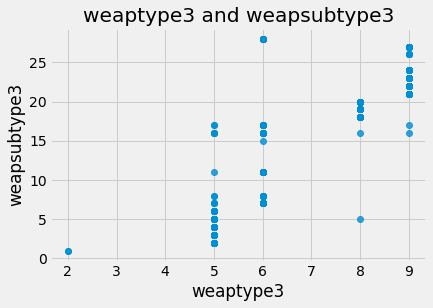

In [290]:
# determine variable thats highly correlated with "weapsubtype3"
print(corr_matrix.loc[corr_matrix['weapsubtype3'] > 0.9, corr_matrix['weapsubtype3'] > 0.9])

sns.regplot('weaptype3', 'weapsubtype3', data=df, fit_reg=False)
plt.title('weaptype3 and weapsubtype3')

We can see from above heatmap that we've got several variables thatre correlating highly (90%) "weapsubtype4". We do not need to keep all of these, that goes for all fo the corresponding variables shown individually int he above correlation matrices and scatter-plots.

              targtype2  targsubtype2   natlty2  weapsubtype4     ndays  \
targtype2      1.000000      0.972578 -0.022837      1.000000 -0.019361   
targsubtype2   0.972578      1.000000 -0.009738      1.000000 -0.004327   
natlty2       -0.022837     -0.009738  1.000000      1.000000  0.051349   
weapsubtype4   1.000000      1.000000  1.000000      1.000000  0.989554   
ndays         -0.019361     -0.004327  0.051349      0.989554  1.000000   
ransomamt      0.097549      0.077324 -0.046074      0.904194  0.129407   

              ransomamt  
targtype2      0.097549  
targsubtype2   0.077324  
natlty2       -0.046074  
weapsubtype4   0.904194  
ndays          0.129407  
ransomamt      1.000000  


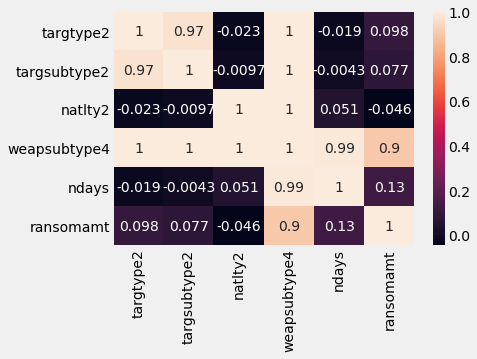

In [291]:
# determine variable thats highly correlated with "weapsubtype4"
print(corr_matrix.loc[corr_matrix['weapsubtype4'] > 0.9, corr_matrix['weapsubtype4'] > 0.9])

sns.heatmap(corr_matrix.loc[corr_matrix['weapsubtype4'].abs() > 0.9, corr_matrix['weapsubtype4'].abs() > 0.9], annot=True)

           INT_LOG  INT_IDEO
INT_LOG   1.000000  0.996288
INT_IDEO  0.996288  1.000000


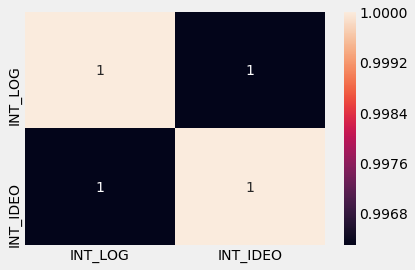

In [292]:
# determine variable thats highly correlated with "INT_IDEO"
print(corr_matrix.loc[corr_matrix['INT_IDEO'] > 0.9, corr_matrix['INT_IDEO'] > 0.9])

sns.heatmap(corr_matrix.loc[corr_matrix['INT_IDEO'].abs() > 0.9, corr_matrix['INT_IDEO'].abs() > 0.9], annot=True)

In [293]:
#Drop features

df.drop(to_drop, axis=1, inplace=True)

_ = str('Shape of dataset as a whole, after removing columns that held greater than 95 percent missing values\nas well as all highly collinear variables, for all data types(integer, float, categorical):\n ' + str(df.shape) + '.')
print(_)

Shape of dataset as a whole, after removing columns that held greater than 95 percent missing values
as well as all highly collinear variables, for all data types(integer, float, categorical):
 (191464, 119).


**Variable Correlation after collinear feature removal**

_Lets take a look at the correlation of remaining variables (after removing highly collinear cols) with a heatmap_


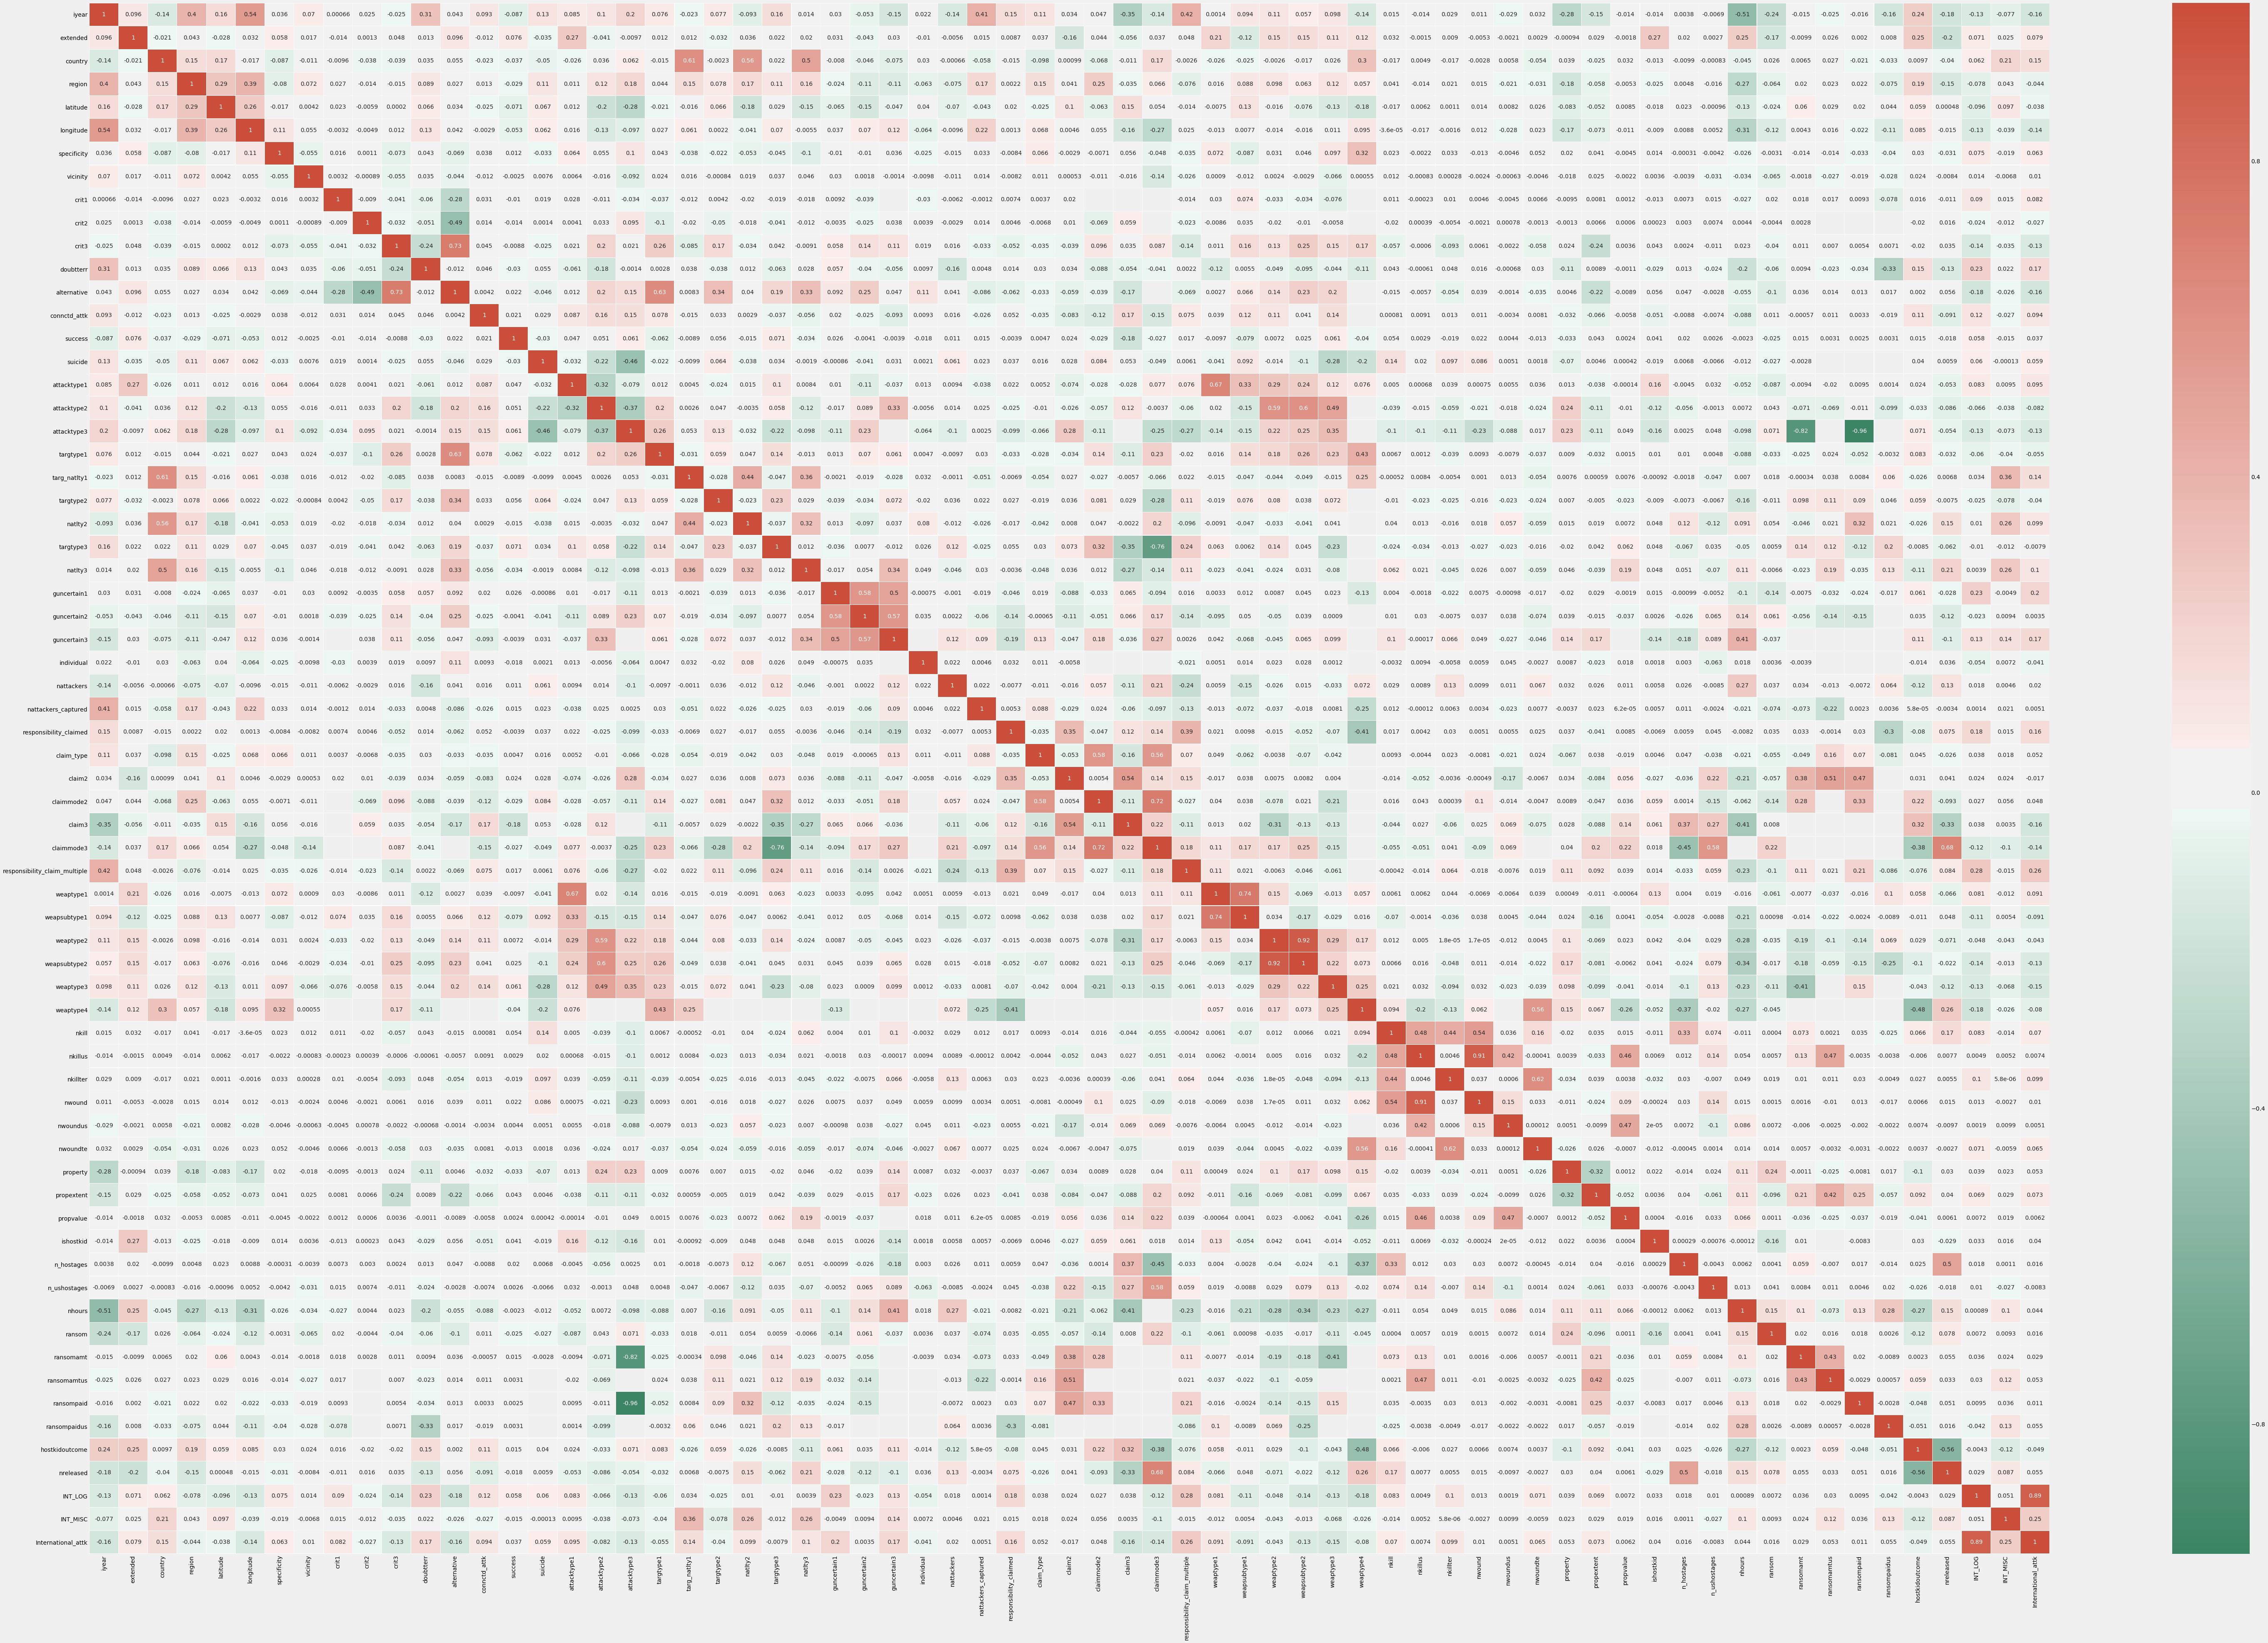

In [294]:
corr = df.corr()

#Customize colormap
colormap = sns.diverging_palette(150, 17, as_cmap=True)

#Plot
fig, axes = plt.subplots(figsize=(85,55))
heatmap = sns.heatmap(corr, ax=axes, cmap=colormap, linewidth=0.1, annot=True)
plt.tight_layout()

**Impute missing values**

Missing value fill strategy highly depends on missing percentage. To begin with we will use a simple strategy, taking the mean of numericals and the median of the categoric **(?)**

In [ ]:
#Re-establish subsets per type for easier interpretation
cat_cols = df.select_dtypes('object') 
print(cat_cols.shape)
int_cols = df.select_dtypes('integer') 
print(int_cols.shape)
float_cols = df.select_dtypes('float')
print(float_cols.shape)
num_cols = pd.concat([float_cols, int_cols], axis=1)
print(num_cols.shape)

In [ ]:
#Impute numerical missing values with mean
#num_cols.fillna(num_cols.mean(), inplace=True)

In [ ]:
#Impute categorical missing values
#cat_cols.fillna(cat_cols.median(), inplace=True)

**Dealing with Outliers**

Want to be careful, not to throw away valuable information. When working with outliers, this also stands and with any data, is always smart to be conservative. A good guide would be to remove only the most extreme outliers. 
In general, **extreme outliers would be below first quartile -3 * Interquartile Range on low end, and on the high end, above Third Quartile + 3 * Interquartile Range.

Lets go ahead and move forward with this and remove only the low, and high end

In [ ]:
#df_updated = pd.concat([num_cols, cat_cols], axis=1)
df_updated.shape

from scipy import stats
#(method1)Remove all outliers:
df_updated[(np.abs(stats.zscore(df_updated)) < 3).all(axis=1)]
df.shape

#(method2)Calculate 1st and 3rd quartiles:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

#Calculate interquartile range:
IQR = Q3 - Q1
print(IQR) 

#Select all outliers:
outliers = df_updated[~((df_updated < (Q1 - 1.5 * IQR)) |(df_updated > (Q3 + 1.5 * IQR))).any(axis=1)]
print(outliers.shape)

#Remove all outliers(samples/rows):
df_updated.drop(outliers.index(), inplace=True)
print(df_updated.shape)

#(method3)Create quartiles w/ np.percentile func:
quartiles = np.percentile(df_updated['df_updated'], [25, 50, 75])
#Establish IQR:
mu, sig = quartiles[1], 0.74 * (quartiles[2] - quartiles[0])
#Remove All Outliers with query func:
df_updated = df_updated.query('(df_updated > @mu - 5 * @sig) & (df_updated < @mu + 5 * @sig)')

**Text variables**
- create distinct list of text features for later on when needing to extract features from text data


In [ ]:
txt_cols = df[['ransomnote','summary','scitations','propcomment', 'addnotes', 'motive','weapdetail']]


print(df.scitations[5])
print(df.addnotes[5])

*We can see the similarity in type of information, (what to do with these? combine and drop orig, or keep seperate) lets consolidate some more by combining "addnotes" with "scitations" and get rid of both orginals.*
df['scitations_and_notes'] = df['scitations'].astype(str) + ' ... ' + df['addnotes'].astype(str)
df.drop(columns=['scitations', 'addnotes'], inplace=True)

**Feature Engineering**

In [ ]:
#df['attacktype_succ'] = df.loc[df.success == 1, 'attacktype1']#.value_counts(ascending=False)
#df['attacktype_unsucc'] = df.loc[df.success == 0, 'attacktype1']#.value_counts(ascending=False)

#df['weaptype_succ'] = df.loc[df.success == 1, 'weaptype1']#.value_counts(ascending=False)
#df['weaptype_unsucc'] = df.loc[df.success == 0, 'weaptype1']#.value_counts(ascending=False)

#df['target_succ'] = df.loc[df.success == 1, 'targtype1']#.value_counts(ascending=False)
#df['target_unsucc'] = df.loc[df.success == 0, 'targtype1']#.value_counts(ascending=False)

targtype1_outliers = []
for i, row in df.iterrows():
    if row['targtype1'] == 1:
        targtype1_outliers.append('biz')
    elif row['targtype1'] == 2:
        targtype1_outliers.append('gov')
    elif row['targtype1'] == 3:
        targtype1_outliers.append('police')
    elif row['targtype1'] == 4:
        targtype1_outliers.append('military')
    elif row['targtype1'] == 14:
        targtype1_outliers.append('citizen&_property')
    else:
        targtype1_outliers.append(np.nan)
             
df['targtype1_outlier_grps'] = targtype1_outliers
df['targtype1_iqr_grps'] = df['targtype1_outlier_grps'].isnull()

**TRAIN TEST SPLIT**

- always want to inpute before splitting